In [1]:
import pandas as pd
import gc 
import warnings
import numpy as np
from datetime import timedelta
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Question 1

## 1.1

In [2]:
N = 240

In [3]:
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration_of_ones =[15,20,25,15,20,25]

In [4]:
# def TC_generator(index, N, AV, IV, duration_of_ones,debug_mode = 0):
#     array = [ AV[index]  for i in range(0, N) ]
#     array_2 =  [ array[i] + IV[index] if i%(duration_of_ones[index]*2) < duration_of_ones[index] else array[i] for i in range(0, N) ]
#     if(debug_mode != 0):
#         print(array)
#         print(array_2)
        
#     return array_2

In [5]:
def TC_generator(index, N, AV, IV, duration_of_ones,debug_mode = 0):
    array = [ 0 if i >= AV[index] else 0 for i in range(0, N)]
    array_2 =  [1 if i >= AV[index] and (i - AV[index])%IV[index]  < duration_of_ones[index] else array[i] for  i in range(0, len(array))]
    if(debug_mode != 0):
        print(array)
        print(array_2)
        
    return array_2

# T1

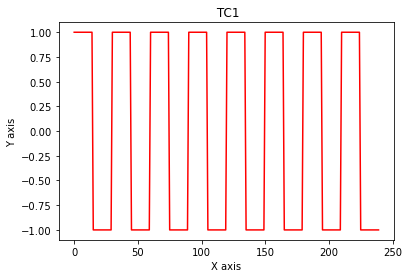

In [6]:
current_T1 = TC_generator(0,240, AV,IV, duration_of_ones)
current_T1 = np.array(current_T1)
standardized_current_T1= [(current_T1[i] - current_T1.mean())/ current_T1.std() for i in range(0, N)]
# data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC1")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T1, color ="red")
plt.show()

## T2

1


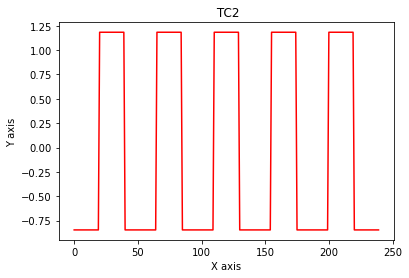

In [7]:
scaler = StandardScaler()
current_T2 = TC_generator(1, N, AV,IV, duration_of_ones)
current_T2 = np.array(current_T2)
standardized_current_T2=  (current_T2 - np.mean(current_T2)) / np.std(current_T2)
# standardized_current_T2 = scaler.fit_transform(np.array(current_T2))
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
print(current_T2[30])
plt.title(" TC2")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T2, color ="red")
plt.show()

## T3

0


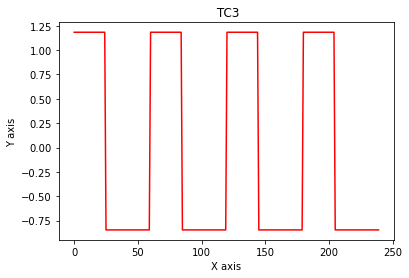

In [8]:
current_T3 = TC_generator(2, 240, AV,IV, duration_of_ones)
current_T3 = np.array(current_T3)
standardized_current_T3 = [(current_T3[i] - current_T3.mean())/ current_T3.std() for i in range(0, N)]
 # data to be plotted
print(current_T3[30])
x = [i for i in range(0, N)]
# plotting
plt.title(" TC3")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T3, color ="red")
plt.show()

## T4

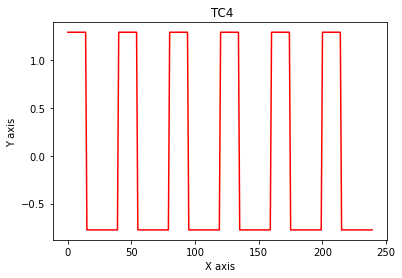

In [9]:
current_T4 = TC_generator(3, 240, AV,IV, duration_of_ones)
current_T4 = np.array(current_T4)
standardized_current_T4= [(current_T4[i] - current_T4.mean())/ current_T4.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC4")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T4, color ="red")
plt.show()

## T5

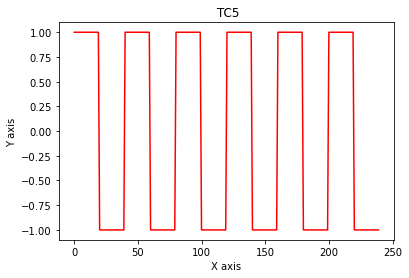

In [10]:
current_T5 = TC_generator(4, 240, AV,IV, duration_of_ones)
current_T5 = np.array(current_T5)
standardized_current_T5= [(current_T5[i] - current_T5.mean())/ current_T5.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC5")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T5, color ="red")
plt.show()

## T6

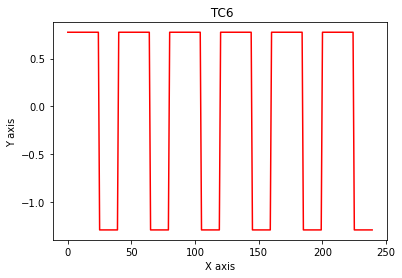

In [11]:
current_T6 = TC_generator(5, 240, AV,IV, duration_of_ones)
current_T6 = np.array(current_T6)
standardized_current_T6= [(current_T6[i] - current_T6.mean())/ current_T6.std() for i in range(0, N)]
 # data to be plotted
x = [i for i in range(0, N)]
# plotting
plt.title(" TC6")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, standardized_current_T6, color ="red")
plt.show()

In [12]:
current_T6.mean()

0.625

### For difference TCs, they might not center around the origin after dividing the l_2 norm, it makes the comparsions between different TCs harder.

# 1.2 

### Create the dataframe

In [13]:
data = {
    "T_1":  standardized_current_T1,
    "T_2":  standardized_current_T2,
    "T_3":  standardized_current_T3,
    "T_4":  standardized_current_T4,
    "T_5":  standardized_current_T5, 
    "T_6":  standardized_current_T6,
}

In [14]:
data_frame_time_courses = pd.DataFrame(data)
data_frame_time_courses.head(10)

,T_1,T_2,T_3,T_4,T_5,T_6
0,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
1,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
2,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
3,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
4,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
5,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
6,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
7,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
8,1.0,-0.845154,1.183216,1.290994,1.0,0.774597
9,1.0,-0.845154,1.183216,1.290994,1.0,0.774597


In [15]:
data_frame_time_courses.describe()

,T_1,T_2,T_3,T_4,T_5,T_6
count,240.00000,2.400000e+02,2.400000e+02,2.400000e+02,240.00000,2.400000e+02
mean,0.00000,5.643634e-17,-2.396231e-16,2.701543e-16,0.00000,-1.794861e-16
std,1.00209,1.002090e+00,1.002090e+00,1.002090e+00,1.00209,1.002090e+00
min,-1.00000,-8.451543e-01,-8.451543e-01,-7.745967e-01,-1.00000,-1.290994e+00
25%,-1.00000,-8.451543e-01,-8.451543e-01,-7.745967e-01,-1.00000,-1.290994e+00
50%,0.00000,-8.451543e-01,-8.451543e-01,-7.745967e-01,0.00000,7.745967e-01
75%,1.00000,1.183216e+00,1.183216e+00,1.290994e+00,1.00000,7.745967e-01
max,1.00000,1.183216e+00,1.183216e+00,1.290994e+00,1.00000,7.745967e-01


In [16]:
result = data_frame_time_courses.corr()

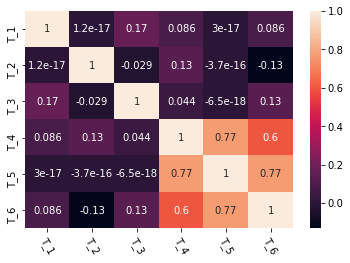

In [17]:
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=data_frame_time_courses.columns, xticklabels = data_frame_time_courses.columns)
plt.xticks(rotation=300)
plt.show()

### TCs with the same onset arrival vector are highly correlated, despite the fact that they have different duration of ones.

# 1.3

In [18]:
slice_1 = np.zeros((21,21))
slice_1[2-1:6,2-1:6] = 1

In [19]:
slice_2 = np.zeros((21,21))
slice_2[2-1:6,15-1:19] = 1

In [20]:
slice_3 = np.zeros((21,21))
slice_3[8-1:13,2-1:6] = 1

In [21]:
slice_4 = np.zeros((21,21))
slice_4[8-1:13,15-1:19] = 1

In [22]:
slice_5 = np.zeros((21,21))
slice_5[15-1:19,2-1:6] = 1

In [23]:
slice_6 = np.zeros((21,21))
slice_6[15-1:19,15-1:19] = 1

In [24]:
output_array = np.stack((slice_1.transpose(),slice_2.transpose(),slice_3.transpose(),slice_4.transpose(),slice_5.transpose(),slice_6.transpose(),), axis = 0)

In [25]:
output_array.shape

(6, 21, 21)

SM1


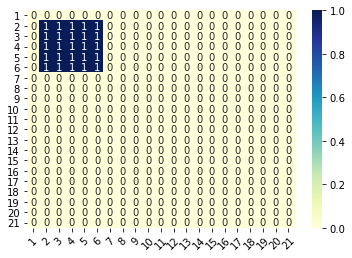

SM2


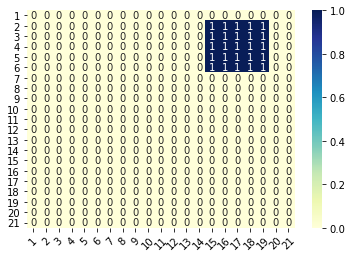

SM3


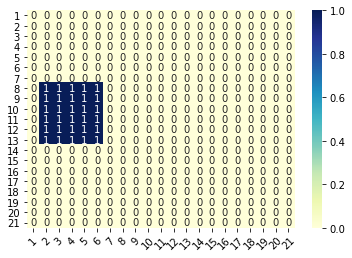

SM4


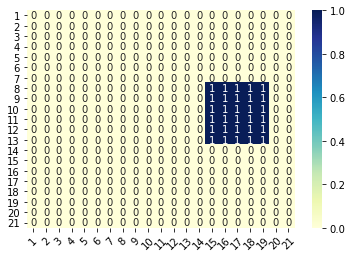

SM5


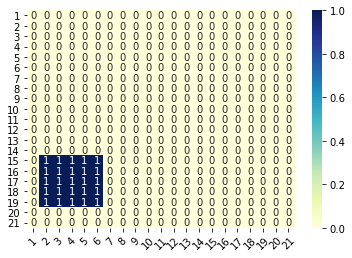

SM6


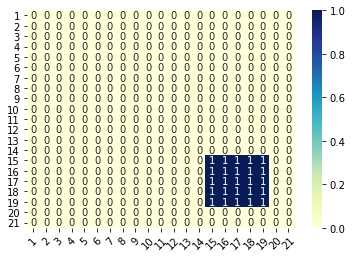

In [26]:
name_list = ['SM1','SM2','SM3','SM4','SM5','SM6']
slices = [slice_1,slice_2,slice_3,slice_4,slice_5,slice_6]
axis = [i+1 for i in range(0,21)]
for name, SM in zip(name_list, slices):
    print(name)
    heatmap  = sns.heatmap(SM, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu")
    plt.xticks(rotation=45)
    plt.show()

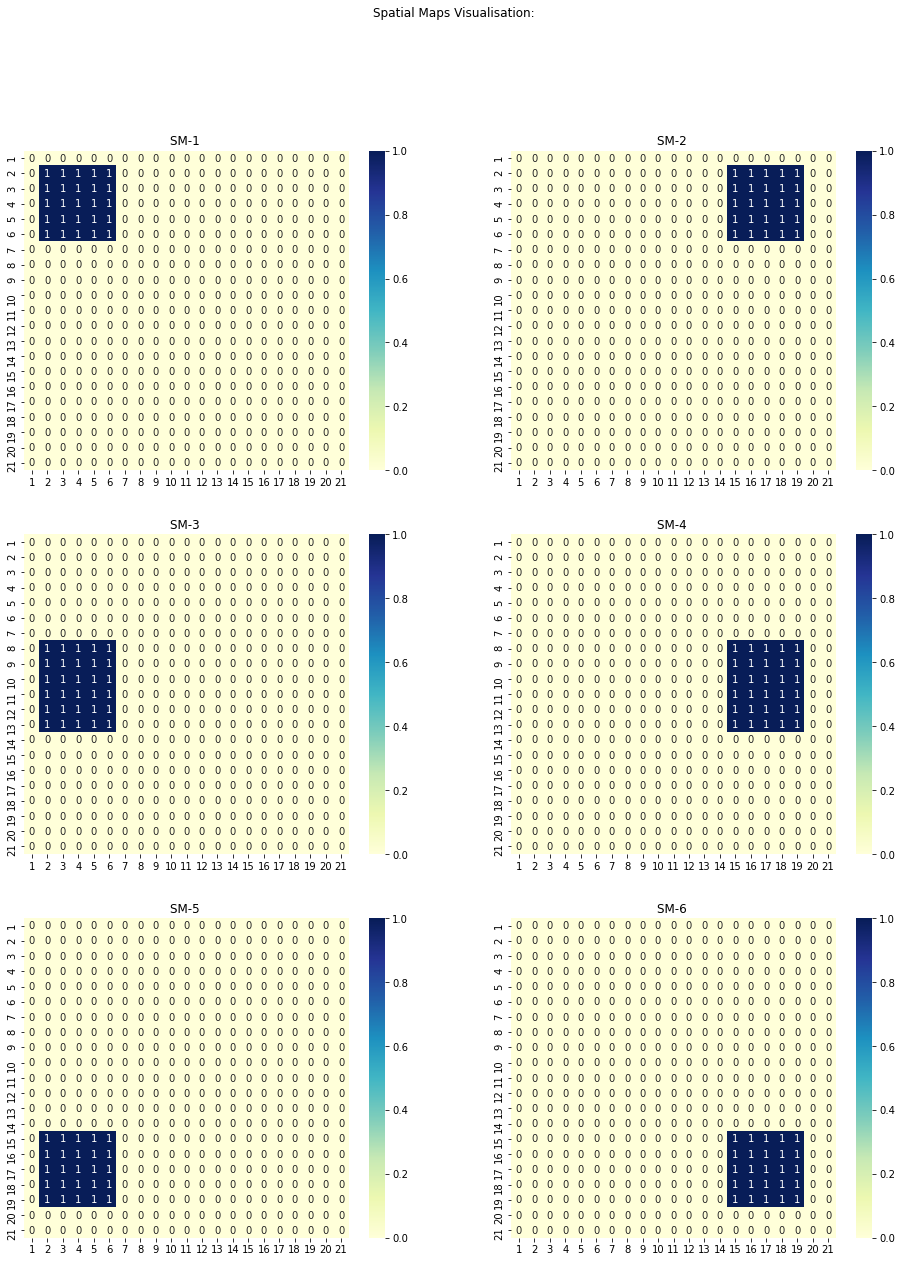

In [27]:
#plotting together
x = [i+1 for i in range(0,21)]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,20))
fig.suptitle(r"Spatial Maps Visualisation: ")
ax1.set_title("SM-1 " )
sns.heatmap(slice_1, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax1)
ax2.set_title("SM-2 " )
sns.heatmap(slice_2, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax2)
ax3.set_title("SM-3 " )
sns.heatmap(slice_3, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax3)
ax4.set_title("SM-4 " )
sns.heatmap(slice_4, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax4)
ax5.set_title("SM-5 " )
sns.heatmap(slice_5, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax5)
ax6.set_title("SM-6 " )
sns.heatmap(slice_6, annot=True,yticklabels=axis,xticklabels = axis,cmap="YlGnBu", ax = ax6)
   
fig.show()

In [28]:
SMs = np.reshape(output_array , (6,441))
print(SMs[0][25:35])

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
 SMs.shape

(6, 441)

In [30]:
result = np.corrcoef(SMs)

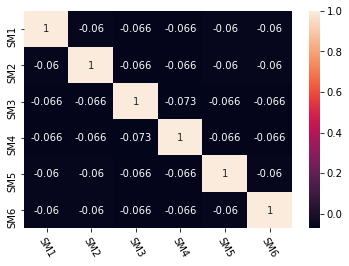

In [31]:
lst = ["SM1","SM2","SM3","SM4","SM5","SM6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=lst, xticklabels = lst)
plt.xticks(rotation=300)
plt.show()

### From CM above, it seems to suggest that the SMs are independent of each other. All values on those slices lie in the same range of values, it either takes 0 or 1, so it is unnecessary to standardize them.

## 1.4

In [32]:
import math
noise_TC = np.random.normal(loc = 0.0, scale = 0.5, size = (6, 240)) 
noise_SM = np.random.normal(loc = 0.0, scale = math.sqrt(0.015), size = (6,441)) 

In [33]:
noise_TC.shape

(6, 240)

In [34]:
print(noise_TC)

[[-0.69411261  0.34626738  0.31830023 ... -0.1176068  -0.09719597
  -0.88552813]
 [ 0.76584245  0.12937702  0.8335513  ... -0.56576296 -0.3938548
   0.56278263]
 [ 0.83448352  0.20737966 -0.06642626 ...  0.13034958 -0.28685419
  -0.21732516]
 [ 1.18607207 -0.10420362  1.11090446 ... -0.16628753 -0.98982808
  -0.43989379]
 [ 0.15681292  0.8948937  -0.41453732 ... -0.28465004 -0.2652109
  -0.38535593]
 [ 0.13754514 -0.41043583  0.63153136 ... -0.07726401 -0.62956091
  -0.96562273]]


In [35]:
noise_SM.shape

(6, 441)

## For time courses noise:

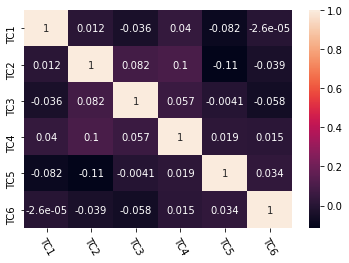

In [36]:
result = np.corrcoef(noise_TC)
TC = ["TC1","TC2","TC3","TC4","TC5","TC6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True, yticklabels=TC, xticklabels = TC)
plt.xticks(rotation=300)
plt.show()

## The noise sources are not correlated

## The histograms of TC noise sources:

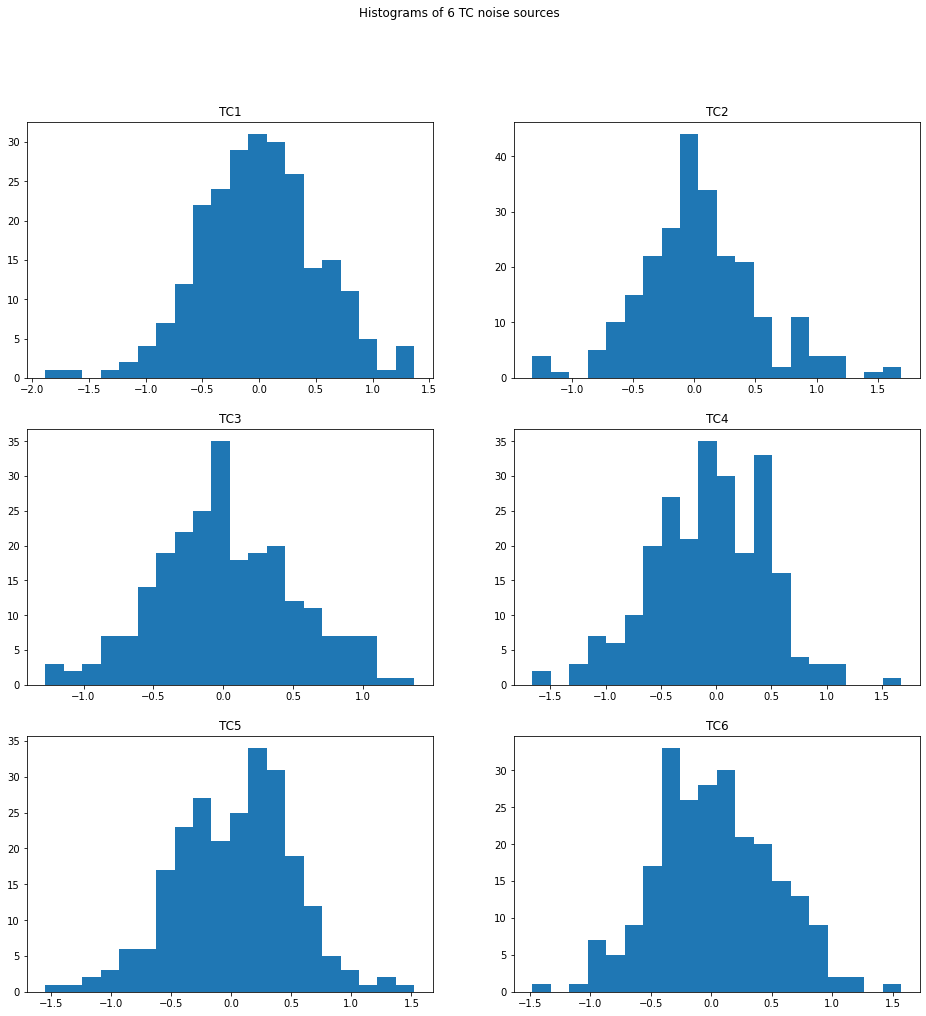

In [125]:
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,16))
fig.suptitle(r"Histograms of 6 TC noise sources")
ax1.set_title(name_list[0])
ax1.hist(noise_TC[0],bins = 20)
ax2.set_title(name_list[1])
ax2.hist(noise_TC[1],bins = 20)
ax3.set_title(name_list[2])
ax3.hist(noise_TC[2],bins = 20)
ax4.set_title(name_list[3])
ax4.hist(noise_TC[3],bins = 20)
ax5.set_title(name_list[4])
ax5.hist(noise_TC[4],bins = 20)
ax6.set_title(name_list[5])
ax6.hist(noise_TC[5],bins = 20)
fig.show()


### Yes, the mean and standard deviations are roughly following the normal distribution with parameters specified.

## For Spatial maps noise:

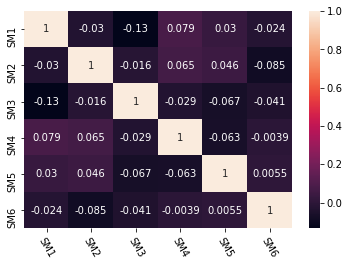

In [38]:
result = np.corrcoef(noise_SM)
SM = ["SM1","SM2","SM3","SM4","SM5","SM6"]
result_matrix = np.array(result)
heatmap  = sns.heatmap(result_matrix, annot=True,yticklabels=SM, xticklabels = SM)
plt.xticks(rotation=300)
plt.show()

## The noise sources are not correlated

## The histograms of SM noise sources:


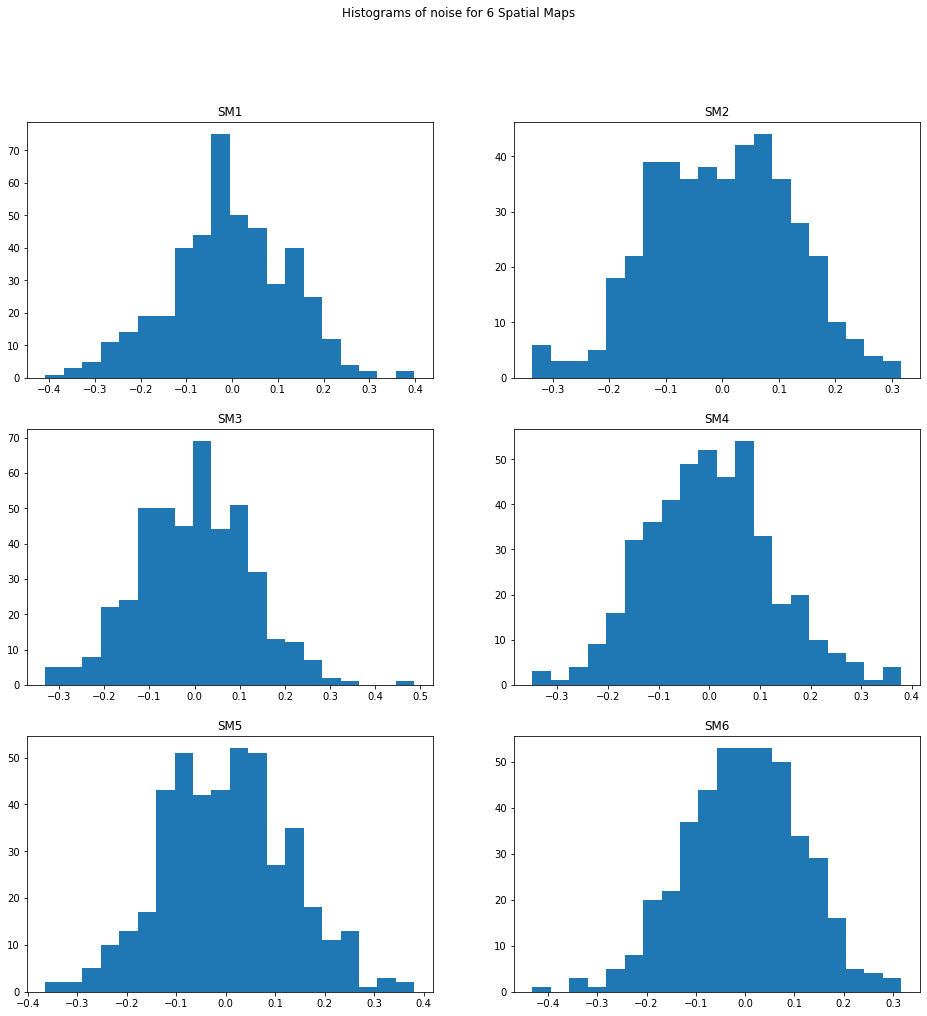

In [124]:
name_list  = ["SM1","SM2","SM3","SM4","SM5","SM6"]
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (16,16))
fig.suptitle(r"Histograms of noise for 6 Spatial Maps")
ax1.set_title(name_list[0])
ax1.hist(noise_SM[0],bins = 20)
ax2.set_title(name_list[1])
ax2.hist(noise_SM[1],bins = 20)
ax3.set_title(name_list[2])
ax3.hist(noise_SM[2],bins = 20)
ax4.set_title(name_list[3])
ax4.hist(noise_SM[3],bins = 20)
ax5.set_title(name_list[4])
ax5.hist(noise_SM[4],bins = 20)
ax6.set_title(name_list[5])
ax6.hist(noise_SM[5],bins = 20)
fig.show()


# Plot the entire noise dataset for temporal and Spatial sources

Text(0.5, 1.0, 'Histogram of Noise dataset for Spatial Sources')

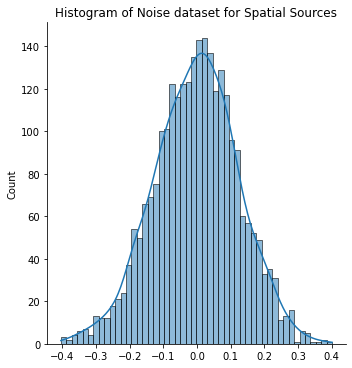

In [40]:

plot = sns.displot(list(np.reshape(noise_SM, (1,2646))[0]), bins = 50, kde = True)
plt.title("Histogram of Noise dataset for Spatial Sources")

Text(0.5, 1.0, 'Histogram of Noise dataset for Temporal Sources')

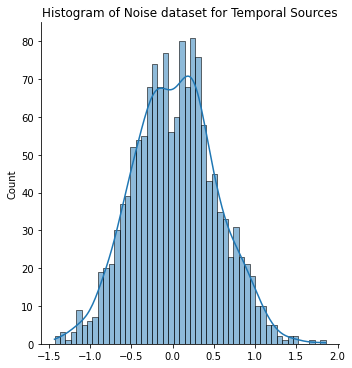

In [41]:
plot2 = sns.displot(list(np.reshape(noise_TC, (1,1440))[0]), bins = 50, kde = True)
plt.title("Histogram of Noise dataset for Temporal Sources")

### Yes, the mean and standard deviations are roughly following the normal distribution with parameters specified.

In [42]:
product = np.matmul(noise_TC.transpose(),noise_SM)

## Correlation between $\Gamma_s\Gamma_t$ and $V$ number of variables

In [43]:
product = np.matmul(noise_TC.transpose(),noise_SM)
print(product.shape)

(240, 441)


# We choose the first 20 variables to see if they have any correlations

In [126]:
rng = np.random.default_rng(int(time.time()))
index_random_selected = rng.integers(low=0, high=441,size = 20)
print(index_random_selected)

[ 50 365 145 232 176 340 419  18 163 161 179 179 400 147 174 206 429 237
 107 341]


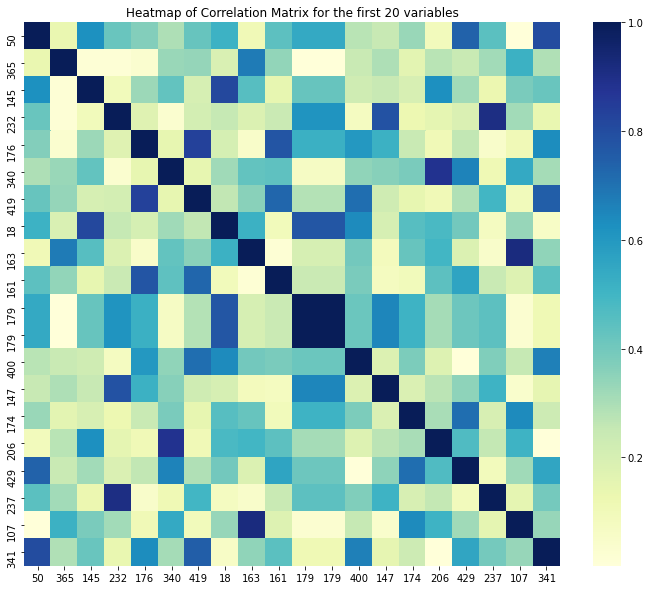

In [135]:
plot = plt.figure(figsize=(12,10))
result = np.corrcoef(np.array(product.T[index_random_selected]))
plt.title("Heatmap of Correlation Matrix for the first 20 variables")
heatmap  = sns.heatmap(abs(result), annot=False,yticklabels=index_random_selected, xticklabels = index_random_selected,cmap="YlGnBu" )

## From the Heatmap of the correlation matrix, we can see that in general $\Gamma_s\Gamma_t$ are moderately correlated either negatively or positively across the $V$ number of variables. This corresponds to the fact that $\Gamma_s\Gamma_t$ is generated by the matrix multiplication between $\Gamma_s$ and $\Gamma_t$

## 1.5

In [45]:
data_frame_time_courses.shape

(240, 6)

In [46]:
noise_TC.transpose().shape

(240, 6)

In [47]:
print(SMs.shape)
print(noise_SM.shape)

(6, 441)
(6, 441)


In [48]:
X = np.matmul((data_frame_time_courses + noise_TC.transpose()),(SMs + noise_SM)) \
#- np.matmul(data_frame_time_courses, noise_SM) - np.matmul(noise_TC.transpose(), SMs) 
print(X.shape)

(240, 441)


# Random Time Series Visualization with 105 random time series choosen

In [49]:
import time
rng = np.random.default_rng(int(time.time()))
index_random_selected = rng.integers(low=0, high=441,size = 105)
print(index_random_selected)

[355 436 114 234  53 344  19 219 168 317 297 287 332 158 251 193 149 144
 209 315  76 332 352 259   4 327 262 258  98 424 109 135 421 283 203 420
   0 120 251 200 210  94 362 378 352 403 214 173 132 214 382 155 367 160
 269 304  56 168 396  39  76 181 319 434  77 125 246 305  20 167 357 412
   0 155 247 272 120 394 262 170 120 430 423  76 134 130 419 263  79 229
 297 251 330 412 186 284 417 255   6 123 130  65 407 238  48]


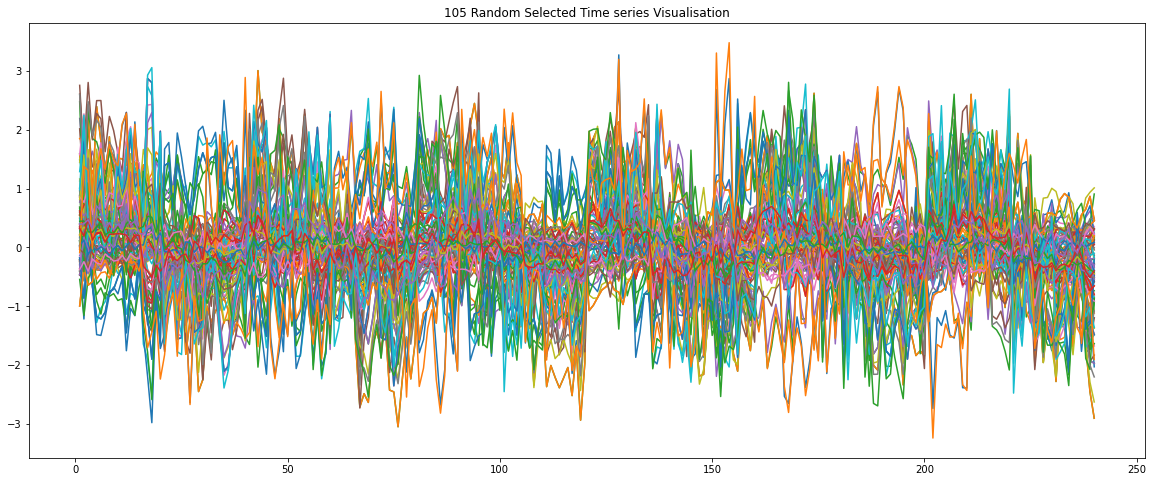

In [50]:
x  =[ i + 1 for i in range(0,240)]
fig = plt.figure(figsize = (20,8))
plt.title("105 Random Selected Time series Visualisation")
plot = plt.plot(x, X[index_random_selected],label = ["X " +str(i) for i in index_random_selected])

# Visualization of variances in the histogram for 441 variables

In [51]:
std_441 = np.array(X.describe())[2]


### Variance

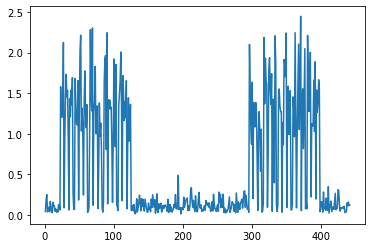

In [52]:
x = [i + 1 for i in range(441)]
var_441 =  [ i*i  for i in std_441]
plt.plot(x, var_441)

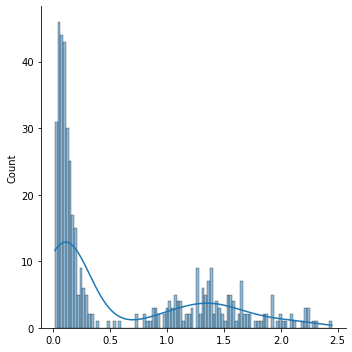

In [53]:
var_441 =  [ i*i  for i in std_441]
sns.displot(var_441, bins = 100, kde = True)

### Standard Deviation

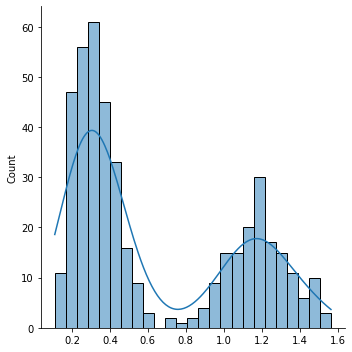

In [54]:
sns.displot(std_441, bins = 25, kde = True)

### These terms can exist when creating the synthetic dataset, but when we are trying to fit the model described in the equation (1), we ignore the existence of these cross terms and the effect of these terms are fitted within $A$ in the model, this can be shown in the later plots of retrieved spatial maps where the noise data are very conspicuous. 


#### From the plot of the variances of 441 variables, we can see that the empirical distribution is bimodal, which is correspond to the number of noise terms we add when creating the synthetic dataset.

## Standardizing the dataset X

In [55]:
Standardized_X  = X.copy()
for column in X.columns:
    Standardized_X[column] = (X[column] - X[column].mean())/X[column].std()


In [56]:
Standardized_X.shape

(240, 441)

In [57]:
Standardized_X.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.556459,1.577879,-0.056794,1.575898,-1.663780,-0.866406,1.112329,-0.850480,0.471613,-0.646407,...,-1.115298,-0.236216,2.047434,1.911005,-2.324678,1.233464,-1.497300,1.275440,-0.260988,-0.228955
1,-0.690407,1.662946,0.407164,1.538058,-0.832293,-2.027151,1.758997,-0.224850,-0.281526,0.180205,...,-1.143963,-0.358224,2.167586,1.542674,-1.242061,1.067424,-1.481685,1.042986,-1.101268,-0.019317
2,-0.393384,1.488313,0.938498,1.212004,-1.620394,0.086301,1.310025,-1.240929,0.310322,-1.229452,...,-1.719685,-0.114298,1.662273,0.329058,-1.058228,1.765111,-1.073025,1.842340,-1.011766,0.646503
3,0.234702,0.820392,0.187930,1.158036,-0.735249,-0.304718,0.350541,-0.677278,0.196086,-0.207911,...,-0.825511,0.239782,1.324390,1.380254,-1.840975,1.175096,-0.668138,0.737226,0.157128,0.016836
4,-0.748386,1.569139,1.536157,1.848334,-0.691339,0.005736,1.280408,-0.311131,0.545774,-0.902203,...,-1.416165,0.740167,1.708629,0.552334,-1.205210,2.136962,-1.024373,1.524729,-0.760186,1.226567


In [58]:
Standardized_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,...,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,2.312965e-18,-2.775558e-17,6.938894e-17,1.665335e-17,2.035409e-17,4.047688e-17,2.775558e-17,-6.591949e-18,-5.273559e-17,-1.572816e-17,...,6.476301e-18,4.961309e-17,-1.110223e-17,-1.676899e-16,-2.197316e-17,-1.073216e-16,1.073216e-16,-4.625929e-17,-4.903485e-17,-3.515706e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.616474e+00,-1.757192e+00,-2.232411e+00,-2.130834e+00,-2.385325e+00,-2.747787e+00,-2.328041e+00,-2.824997e+00,-2.405153e+00,-2.494964e+00,...,-2.308881e+00,-2.042558e+00,-2.013965e+00,-2.530926e+00,-2.394337e+00,-2.169368e+00,-2.494674e+00,-1.824976e+00,-2.299733e+00,-2.602623e+00
25%,-7.530119e-01,-8.038874e-01,-6.854138e-01,-7.695968e-01,-7.055940e-01,-6.936360e-01,-6.963150e-01,-6.773652e-01,-6.856219e-01,-6.354564e-01,...,-7.856230e-01,-7.608713e-01,-7.580294e-01,-6.592536e-01,-7.108540e-01,-7.379058e-01,-7.216348e-01,-7.605078e-01,-7.680693e-01,-6.953412e-01
50%,-2.937950e-02,-9.399578e-02,-2.858502e-02,1.161432e-01,2.530265e-02,-2.895162e-02,-1.860357e-02,-6.401402e-02,2.256837e-02,-3.719196e-02,...,7.736499e-02,-1.305833e-01,-2.313630e-01,3.491386e-02,-9.027235e-02,-8.919282e-02,4.224671e-02,-8.742232e-02,3.978738e-02,8.120292e-02
75%,6.844859e-01,9.260746e-01,7.591169e-01,7.072176e-01,7.059896e-01,7.012891e-01,7.062072e-01,6.098350e-01,7.134534e-01,7.401584e-01,...,7.620943e-01,7.433890e-01,7.130335e-01,7.298633e-01,7.090206e-01,7.342679e-01,7.330704e-01,8.161019e-01,7.731068e-01,6.784767e-01
max,2.375744e+00,1.952823e+00,2.404344e+00,1.958185e+00,2.308258e+00,2.471433e+00,2.396011e+00,3.040171e+00,2.072161e+00,2.089894e+00,...,2.334119e+00,2.288970e+00,2.850799e+00,2.525308e+00,2.394182e+00,2.312981e+00,2.095251e+00,2.315099e+00,2.319112e+00,2.327380e+00


# Question 2

## 2.1

In [59]:
DTD = np.matmul(data_frame_time_courses.transpose(),data_frame_time_courses)
DT_standardised_X = np.matmul(data_frame_time_courses.transpose(),Standardized_X)

In [60]:
Standardized_X.shape

(240, 441)

In [61]:
DTD

,0,1,2,3,4,5
T_1,2.400000e+02,1.776357e-15,4.056740e+01,20.655911,0.000000e+00,20.655911
T_2,1.776357e-15,2.400000e+02,-6.857143e+00,31.423376,4.218847e-15,-31.423376
T_3,4.056740e+01,-6.857143e+00,2.400000e+02,10.474459,-2.886580e-15,31.423376
T_4,2.065591e+01,3.142338e+01,1.047446e+01,240.000000,1.859032e+02,144.000000
T_5,0.000000e+00,4.218847e-15,-2.886580e-15,185.903201,2.400000e+02,185.903201
T_6,2.065591e+01,-3.142338e+01,3.142338e+01,144.000000,1.859032e+02,240.000000


In [62]:
A_LSR = np.matmul(np.linalg.inv(DTD), DT_standardised_X)

In [63]:
A_LSR = abs(A_LSR)

In [64]:
D_LSR  = np.matmul(Standardized_X,A_LSR.transpose())

In [65]:
D_LSR

,0,1,2,3,4,5
0,17.465326,7.364979,41.469202,61.747125,35.631150,25.868208
1,32.766281,-3.983325,31.752776,32.325422,44.389937,15.485942
2,37.103268,16.738254,30.379917,65.171136,25.011707,34.001334
3,9.806741,-1.678623,29.638459,41.200844,17.046887,12.760292
4,34.966644,-3.860171,29.035277,52.385247,30.538895,33.443312
...,...,...,...,...,...,...
235,-13.448444,4.398210,-22.934447,-10.285838,-12.358344,-18.113760
236,-30.122758,-9.728854,-27.940121,-17.003519,-13.371405,-14.051611
237,-26.878527,-24.041624,-17.581073,-28.489106,-27.700301,-31.296371
238,-31.085094,-26.318629,-26.972060,-50.176607,-32.012408,-43.155813


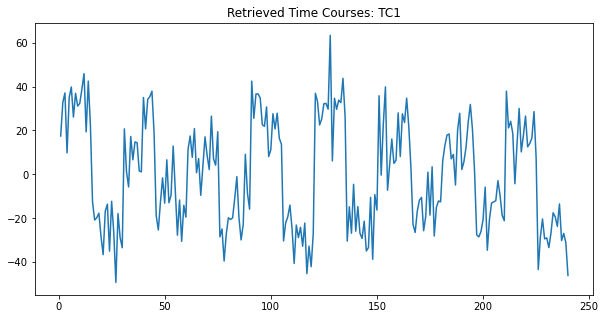

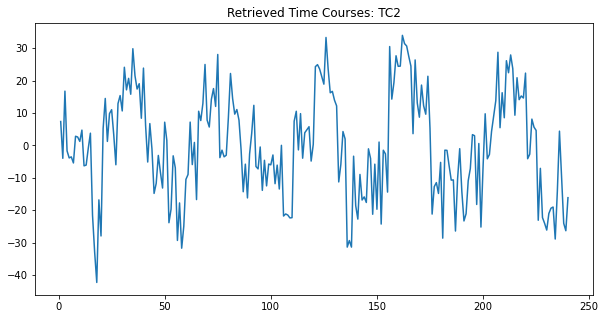

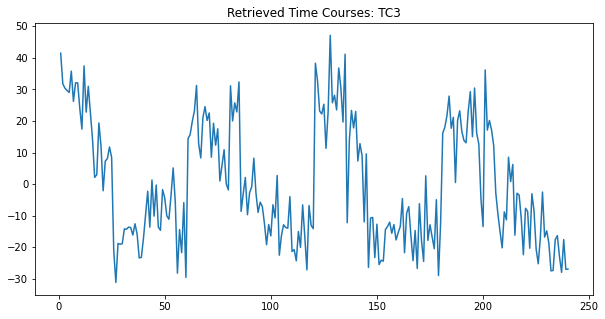

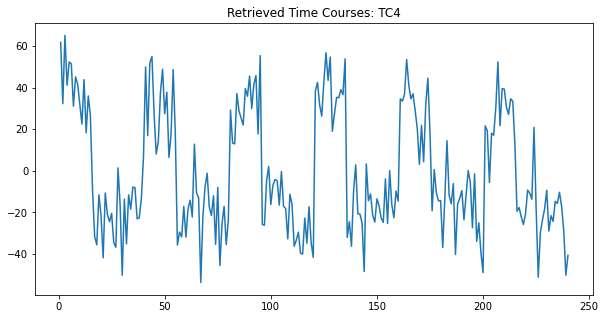

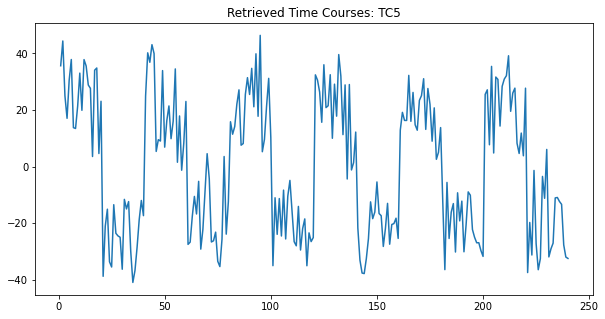

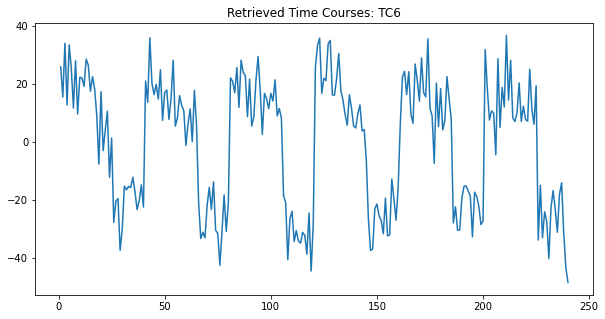

In [66]:
x = [i+1 for i in range(0,240)]
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
for name, index in zip(name_list, [i for i in range(6)]):
    fig = plt.figure(figsize = (10,5))
    plt.title(r"Retrieved Time Courses: " + name)
    plot = plt.plot(x, D_LSR[index])
    

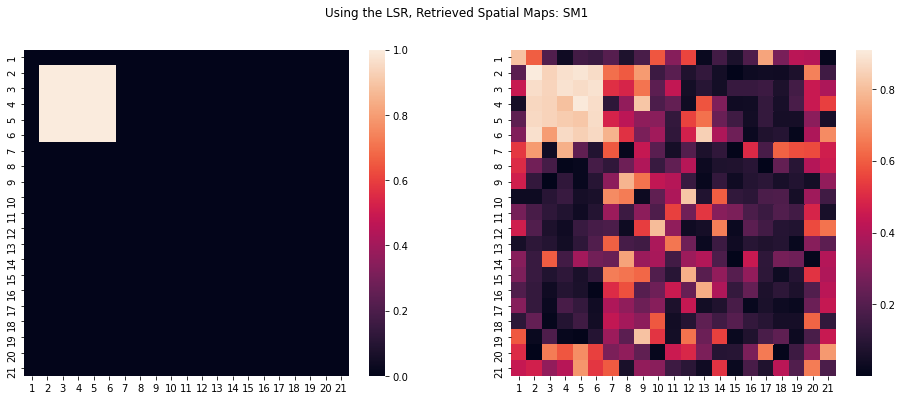

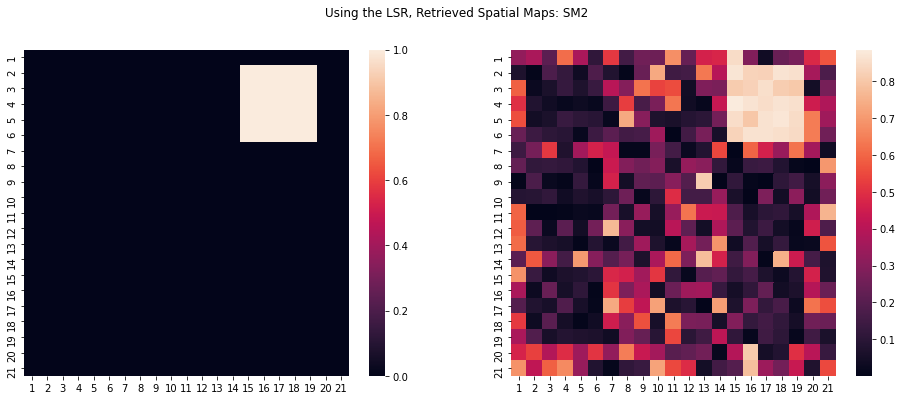

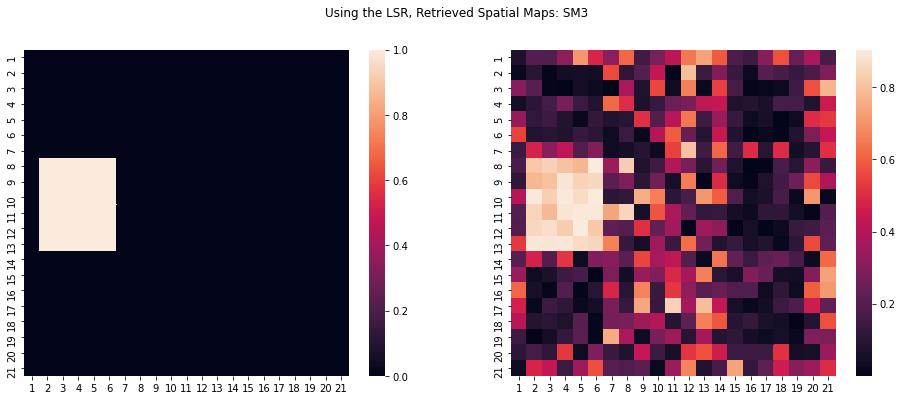

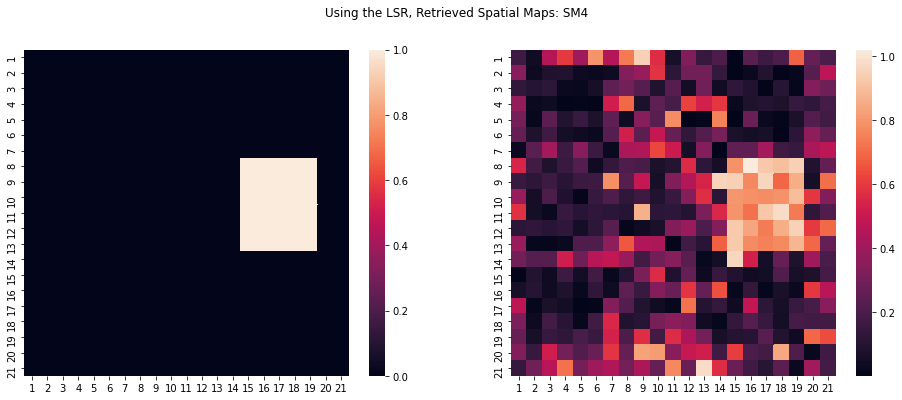

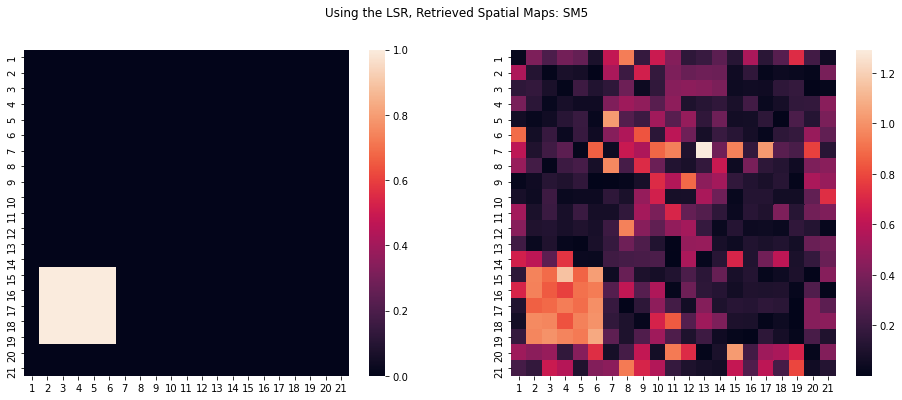

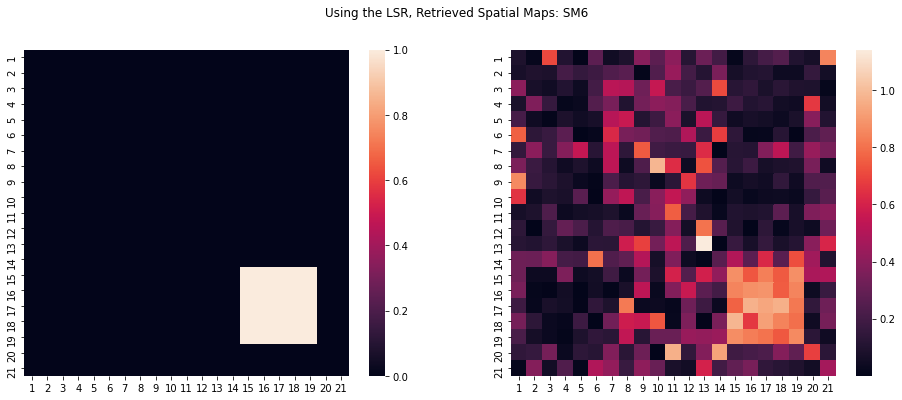

In [67]:
x = [i+1 for i in range(0,21)]
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for name, index in zip(name_list, [i for i in range(6)]):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle(r"Using the LSR, Retrieved Spatial Maps: " + name)
    one_map = np.reshape(np.array(A_LSR.iloc[index,:]), (21,21)).transpose()
    sns.heatmap(one_map,ax = ax2,yticklabels=x,xticklabels=x)
    sns.heatmap(np.reshape(SMs[index], (21,21)).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    fig.show()

## Scatter plot between 30th Columns of Standardized X and 3rd Column of D_LSR

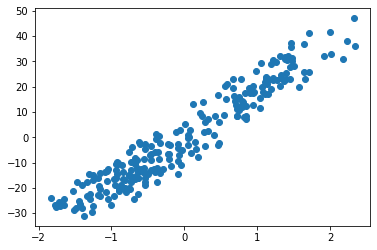

In [68]:
plot  = plt.scatter(Standardized_X[29],D_LSR[2])

In [69]:
np.corrcoef(Standardized_X[29],D_LSR[2])

array([[1.        , 0.95795568],
       [0.95795568, 1.        ]])

## Scatter plot between 30th Columns of Standardized X and 4rd Column of D_LSR

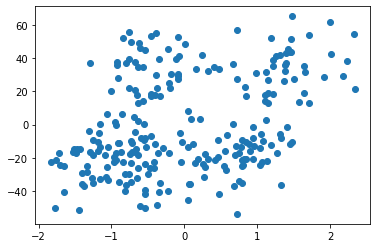

In [70]:
plt.scatter(Standardized_X[29],D_LSR[3])

In [71]:
np.corrcoef(Standardized_X[29],D_LSR[3])


array([[1.        , 0.35980311],
       [0.35980311, 1.        ]])

### Only the third temporal source contributed to the value of this element on the spatial map as only the third spatial map turn out to be 1 at this pixel value, which will preserve the effect from the temporal sources after taking the dot product in the matrix multiplication. 

## 2.2

In [72]:
A_LSR.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,0.811872,0.214276,0.444716,0.052845,0.223528,0.297440,0.531676,0.502967,0.466589,0.034311,...,0.641630,0.217658,0.403072,0.393151,0.417988,0.441329,0.118738,0.447516,0.719628,0.180750
1,0.323342,0.071163,0.591110,0.500698,0.559360,0.237016,0.144162,0.231225,0.009145,0.089345,...,0.182323,0.570682,0.070397,0.076080,0.240141,0.558151,0.244247,0.062996,0.129166,0.548064
2,0.069831,0.027065,0.308388,0.046860,0.335795,0.550817,0.139462,0.176136,0.112871,0.400876,...,0.212443,0.219323,0.619145,0.732358,0.716821,0.227190,0.573886,0.284686,0.343155,0.499908
3,0.163258,0.348540,0.132777,0.377599,0.302938,0.262712,0.031755,0.545964,0.155312,0.384945,...,0.700176,0.270336,0.196049,0.185361,0.462242,0.348173,0.176268,0.637862,0.167682,0.180440
4,0.027726,0.551243,0.157700,0.394680,0.064244,0.889331,0.605898,0.485189,0.021120,0.081265,...,0.025307,0.382230,0.353392,0.435206,0.014057,0.311577,0.452165,0.108128,0.424860,0.121876


In [73]:
# Generate the possible values for lambda
lambda_values = np.linspace(0,1,10000)*441

In [74]:
# storing the MSE results for differernt lambda values
identity_matrix = np.identity(6)
MSE_results = []
for values in lambda_values: 
    A_RR = np.matmul(np.linalg.inv(DTD + values*identity_matrix),DT_standardised_X)
    D_RR = np.matmul(Standardized_X,A_RR.transpose())
    X_hat = np.matmul(D_RR, A_RR)
    MSE = mean_squared_error(Standardized_X, X_hat)
    MSE_results.append(MSE)
MSE_results = np.array(MSE_results)

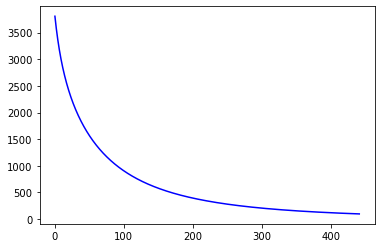

In [75]:
#Plot the graph of MSE against Lambda values.
plt.plot(lambda_values, MSE_results, color ="blue")
plt.show()

In [76]:
# Choose the optimal value that minimize the value of MSE
optimal_lambda = lambda_values[np.argmin(MSE_results)]

In [77]:
# Generate the best A_RR and D_RR and X_hat
A_RR = np.matmul(np.linalg.inv(DTD + optimal_lambda*identity_matrix),DT_standardised_X)
D_RR = np.matmul(Standardized_X,A_RR.transpose())
X_hat = np.matmul(D_RR, A_RR)

In [78]:
corr_result_LSR = []
for i in range(6):
    correction = abs(np.corrcoef(D_LSR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_LSR.append(correction)
corr_result_LSR

[0.8552170917527144,
 0.7461005514668236,
 0.8470714535568125,
 0.880310303538545,
 0.8899604938816382,
 0.9085774706182068]

In [79]:
corr_result_RR = []
for i in range(6):
    correction = abs(np.corrcoef(D_RR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_RR.append(correction)
corr_result_RR

[0.8905281157935453,
 0.8799280086874821,
 0.9031703461852547,
 0.8987475349909423,
 0.9201507693941839,
 0.9021825137418268]

In [80]:
print(sum(corr_result_LSR) < sum(corr_result_RR))


True


In [81]:
print("LSR:")
print(sum(corr_result_LSR))
print("RR:")
print(sum(corr_result_RR))

LSR:
5.12723736481474
RR:
5.394707288793236


# Plot the graphs of respective first vectors from $A_{RR}$ and $A_{LSR}$, when $\lambda = 1000$

In [82]:
A_RR_1000 = np.matmul(np.linalg.inv(DTD + 1000*441*identity_matrix),DT_standardised_X)
D_RR_1000 = np.matmul(Standardized_X,A_RR.transpose())
X_hat_1000 = np.matmul(D_RR, A_RR)

In [83]:
x = [i + 1 for i in range(0,21)]

<AxesSubplot:title={'center':'RR first Spatial map'}>

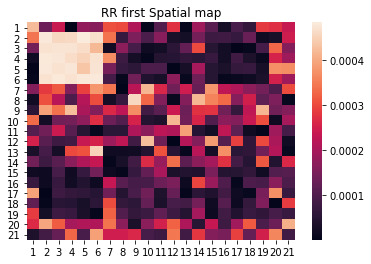

In [84]:
plt.title("RR first Spatial map")
sns.heatmap(abs(np.reshape(np.array(A_RR_1000.iloc[0,:]),(21,21))),yticklabels=x,xticklabels=x)

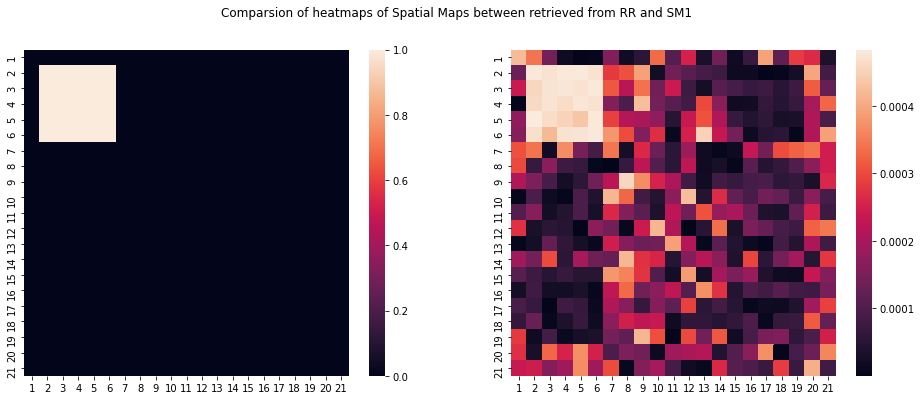

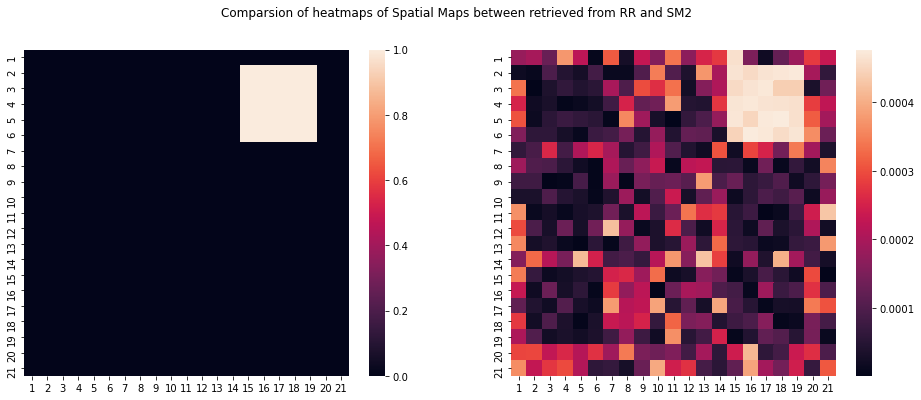

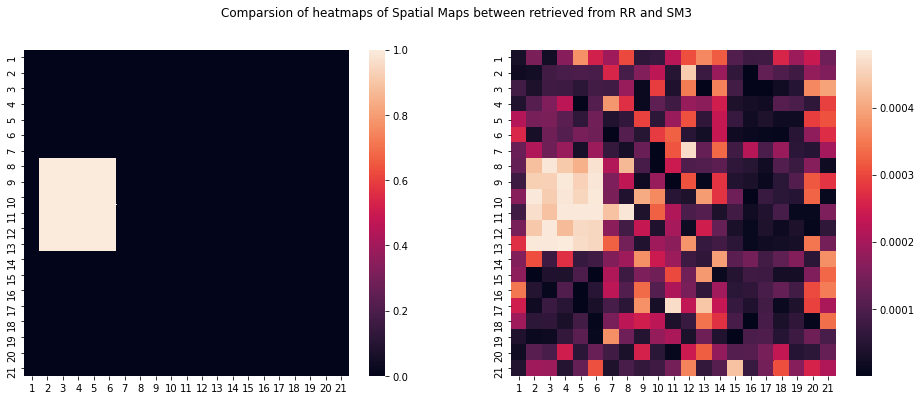

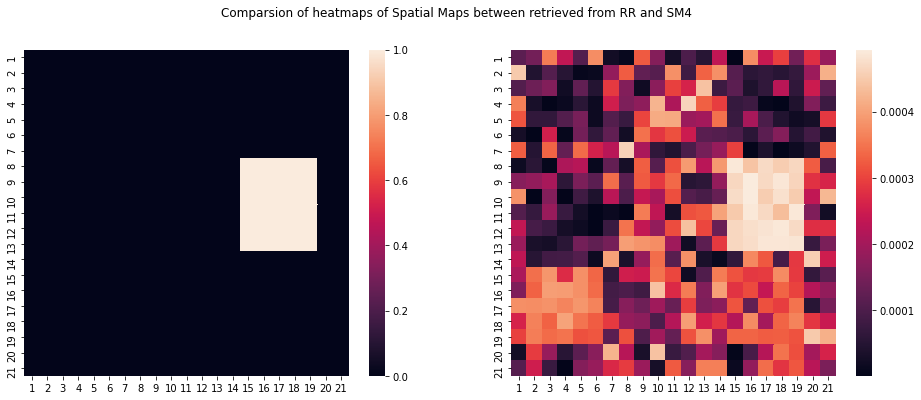

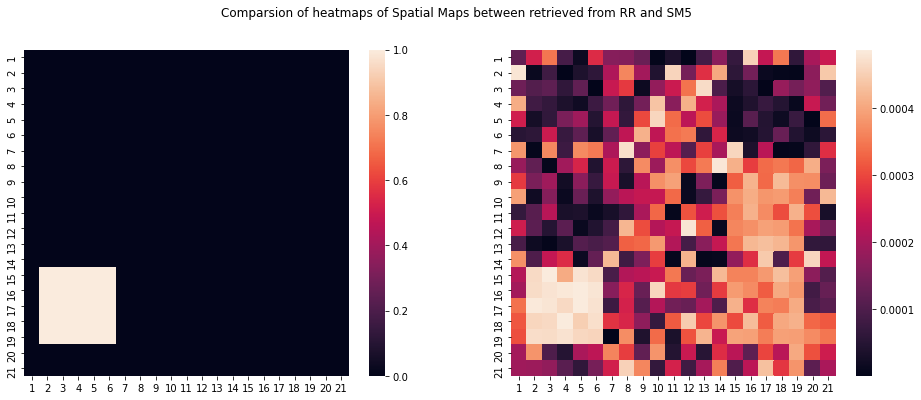

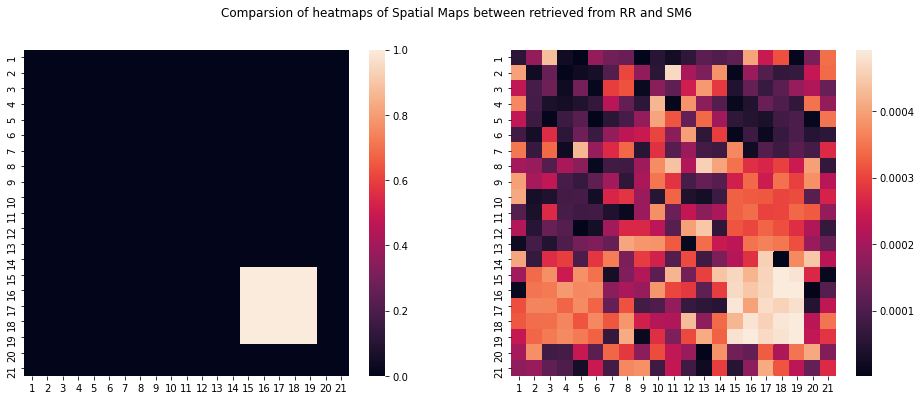

In [85]:
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle("Comparsion of heatmaps of Spatial Maps between retrieved from RR and "  +name_list[i])
    sns.heatmap(np.reshape(SMs[i], (21,21)).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    sns.heatmap(abs(np.reshape(np.array(A_RR_1000.iloc[i,:]),(21,21))).transpose(),yticklabels=x,xticklabels=x,ax =ax2)
    fig.show()

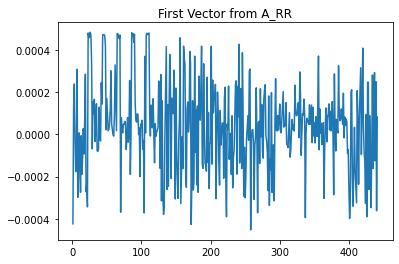

In [86]:
plt.title("First Vector from A_RR")
plt.plot([i+1 for i in range(441)], np.array(A_RR_1000.iloc[0,:]))

<AxesSubplot:title={'center':'LSR first Spatial map'}>

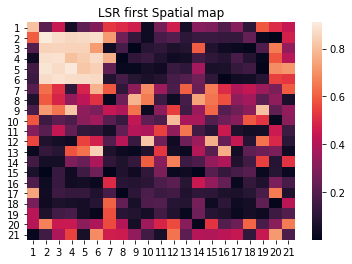

In [87]:
plt.title("LSR first Spatial map")
sns.heatmap(np.reshape(np.array(A_LSR.iloc[0,:]),(21,21)),yticklabels=x,xticklabels=x)

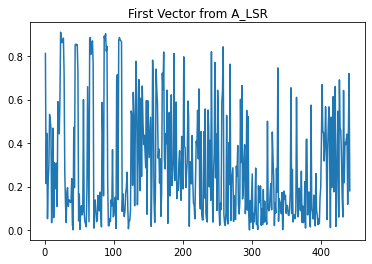

In [88]:
plt.title("First Vector from A_LSR")
plt.plot([i+1 for i in range(441)], np.array(A_LSR.iloc[0,:]))

## Yes, the pixel values of the spatial map from $A_{RR}$ are shrinking to zeros.

## 2.3

In [89]:
from sklearn import linear_model
rou_values = np.linspace(0,1,21)
print(rou_values)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [90]:
MSE_LR_results = []
A_LR_results = []
D_LR_results = []
for i in rou_values:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(data_frame_time_courses, Standardized_X)
    A_LR = clf.coef_.transpose()
    D_LR = np.matmul(Standardized_X,A_LR.transpose())
    MSE = mean_squared_error(Standardized_X, np.matmul(D_LR,A_LR))
    A_LR_results.append(A_LR)
    D_LR_results.append(D_LR)
    MSE_LR_results.append(MSE)
    

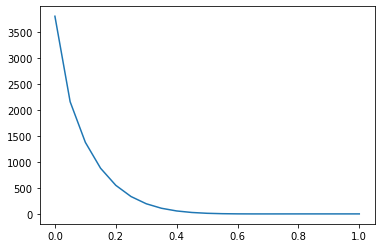

In [91]:
plt.plot(rou_values, MSE_LR_results)

In [92]:
MSE_LR_10results =[]
for k in range(10):
    noise_TC = np.random.normal(loc = 0.0, scale = 0.5, size = (6, 240)) 
    noise_SM = np.random.normal(loc = 0.0, scale = math.sqrt(0.015), size = (6,441)) 
    X = np.matmul((data_frame_time_courses + noise_TC.transpose()),(SMs + noise_SM))
    for column in X.columns:
        Standardized_X[column] = (X[column] - X[column].mean())/X[column].std()
    
    MSE_LR_results = []
    for i in rou_values:
        clf = linear_model.Lasso(alpha=i)
        clf.fit(data_frame_time_courses, Standardized_X)
        A_LR = clf.coef_.transpose()
        D_LR = np.matmul(Standardized_X,A_LR.transpose())
        MSE = mean_squared_error(Standardized_X, np.matmul(D_LR,A_LR))
        A_LR_results.append(A_LR)
        D_LR_results.append(D_LR)
        MSE_LR_results.append(MSE)
    MSE_LR_10results.append(MSE_LR_results)

    

In [93]:
MSE_LR_10results_T = np.array(MSE_LR_10results).transpose()
print(MSE_LR_10results_T.shape)

(21, 10)


In [94]:
Mean_MSE_results_for_10 = []
for i in range(21):
    Mean_MSE_results_for_10.append(MSE_LR_10results_T[i].mean())
print(Mean_MSE_results_for_10)


[3820.682500749077, 2190.9782747145355, 1397.7942732569143, 894.7003129849054, 563.25264646743, 345.19741167437826, 204.04462518533276, 115.24588521530022, 61.467354188495996, 30.494761239153483, 13.746569674671742, 5.457908010001056, 1.8872837838600691, 0.7060438448048132, 0.558824695190372, 0.7324815656062778, 0.907507709864532, 0.9862056054875549, 0.9958206747333559, 0.9958333333333333, 0.9958333333333333]


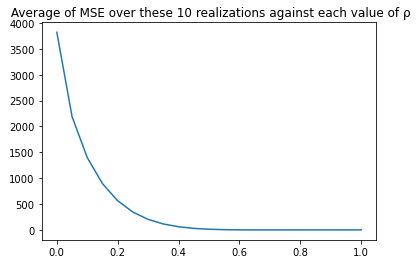

In [95]:
plt.title(" Average of MSE over these 10 realizations against each value of ρ")
plt.plot(rou_values,Mean_MSE_results_for_10)

# Too see the turning point much clear, we apply the log transformation here

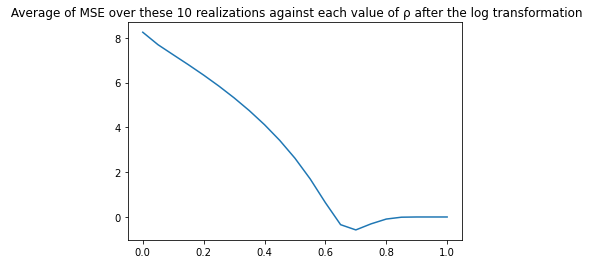

In [96]:
plt.title(" Average of MSE over these 10 realizations against each value of ρ after the log transformation")
plt.plot(rou_values,[math.log(i) for i in Mean_MSE_results_for_10])

In [97]:
optimal_rou_value = rou_values[np.argmin(Mean_MSE_results_for_10)]
print(optimal_rou_value)

0.7000000000000001


### The $\rho$ value found in this case is 0.7000 which minimize the MSE after 10 realizations, this result, in general, should be quite reliable as it is obtained upon 10 times of different realizations of noise sources.

## 2.4

In [98]:
clf = linear_model.Lasso(alpha=optimal_rou_value)
clf.fit(data_frame_time_courses, Standardized_X)
A_LR = clf.coef_.transpose()
D_LR = np.matmul(Standardized_X,A_LR.transpose())

In [99]:
print(A_LR.shape)
print(D_LR.shape)

(6, 441)
(240, 6)


## Estimate the correlation vectors

### For RR:

In [100]:
corr_result_RR_D = []
for i in range(6):
    correction = abs(np.corrcoef(D_RR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_RR_D.append(correction)
corr_result_RR_D

[0.8905281157935453,
 0.8799280086874821,
 0.9031703461852547,
 0.8987475349909423,
 0.9201507693941839,
 0.9021825137418268]

In [101]:
corr_result_RR_A = []
for i in range(6):
    correction = abs(np.corrcoef(A_RR.iloc[i,:], np.array(SMs[i]))[1,0])
    corr_result_RR_A.append(correction)
corr_result_RR_A

[0.5126246469778107,
 0.5433687609308464,
 0.5750882767754855,
 0.49338139241328133,
 0.4227407610421592,
 0.45665408736346186]

### For LR:

In [102]:
corr_result_LR_D = []
for i in range(6):
    correction = abs(np.corrcoef(D_LR[i], np.array(data_frame_time_courses.iloc[:,i]))[1,0])
    corr_result_LR_D.append(correction)
corr_result_LR_D

[0.8835176775109943,
 0.897143435391975,
 0.8966011356597247,
 0.8986271286987264,
 0.9172638368718763,
 0.9177151676445104]

In [103]:
corr_result_LR_A = []
for i in range(6):
    correction = abs(np.corrcoef(A_LR[i], np.array(SMs[i]))[1,0])
    corr_result_LR_A.append(correction)
corr_result_LR_A

[0.9367997274551753,
 0.9078491655234883,
 0.9204459317575769,
 0.9184516529178037,
 0.8311860710080935,
 0.8106767544723879]

In [104]:
print(sum(corr_result_LR_D) > sum(corr_result_RR_D))

True


In [105]:
print(sum(corr_result_LR_A) > sum(corr_result_RR_A))

True


In [106]:
A_RR

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.276462,0.076105,0.154052,-0.012338,-0.099307,-0.098690,0.187142,-0.190837,-0.146775,0.008364,...,-0.223531,-0.058871,0.162593,-0.118769,0.113590,0.177180,-0.061477,0.156872,-0.235111,0.056318
1,0.114939,-0.014204,-0.214425,-0.163720,-0.196987,-0.098424,0.042613,-0.114381,-0.042568,-0.023370,...,0.023380,-0.233856,-0.016604,-0.004785,0.063588,-0.194678,-0.062230,0.002189,-0.058502,-0.199135
2,-0.004665,-0.002173,-0.073260,0.017769,-0.129828,-0.169031,0.066492,-0.075908,0.047232,0.119027,...,0.054550,0.092117,0.226101,0.222695,-0.232570,0.113488,-0.208379,-0.078175,0.100394,-0.148324
3,0.058356,0.199250,0.037803,0.161343,-0.145854,-0.010280,0.124554,-0.053191,0.037166,-0.165429,...,-0.162197,-0.098619,0.111598,0.065379,-0.101083,0.068644,-0.077577,0.207213,-0.120127,0.060089
4,0.056776,0.212924,0.046397,0.180073,-0.096990,-0.053517,0.172314,0.102512,0.116325,-0.156020,...,-0.052386,-0.042374,0.098695,0.058208,-0.048799,0.024039,-0.140076,0.141238,-0.113363,0.079106
5,0.024006,0.156063,0.120283,0.149273,-0.094895,0.079736,0.148733,0.118633,0.218017,-0.194320,...,0.007988,0.103814,0.080555,-0.028377,-0.026971,0.110877,-0.164145,0.101439,-0.048819,0.138047


In [107]:
D_RR

,0,1,2,3,4,5
0,9.699612,2.415215,43.571888,51.339021,39.488289,37.697456
1,27.206650,-11.379661,30.207354,32.351586,35.921245,28.121591
2,33.204121,1.186397,24.837124,50.118360,34.659199,38.402517
3,4.622771,-10.639690,32.609647,28.265704,17.647129,19.759323
4,27.812745,-27.502431,25.310095,40.529872,35.894875,41.590298
...,...,...,...,...,...,...
235,-9.973306,11.387973,-29.695394,-12.905238,-16.334782,-22.479376
236,-30.813492,-5.344448,-31.740059,-16.793786,-13.601271,-15.793257
237,-25.209320,-29.355648,-15.031157,-38.015630,-38.467959,-35.383128
238,-26.995186,-25.911264,-24.380825,-53.477761,-48.209014,-48.769626


In [108]:
print(D_LR)

            0         1         2         3         4         5
0    3.275758 -0.479220  9.513091  4.441960  5.733733  3.954659
1    4.784776 -4.822747  4.585044  4.961706  2.049923  6.534896
2   -0.001461 -2.879785  2.585499  5.536146  7.645703  3.609337
3    0.297584 -4.271614  7.004589  6.847311  4.419080  7.052234
4    4.804041 -6.693379  5.598373  9.217765  6.245240  2.736545
..        ...       ...       ...       ...       ...       ...
235 -1.000917 -2.730059  1.310347 -5.124599 -4.518979 -8.653086
236 -2.566339 -2.100096 -4.550602 -4.034143 -4.955938 -4.554266
237 -2.285267 -3.919302 -5.335968 -5.471119 -8.135841 -7.234336
238 -3.985176 -1.800711 -6.771107 -6.581120 -7.638310 -8.440203
239 -2.789365 -5.711051 -4.862594 -4.791487 -7.300620 -6.721933

[240 rows x 6 columns]


In [109]:
D_LR

,0,1,2,3,4,5
0,3.275758,-0.479220,9.513091,4.441960,5.733733,3.954659
1,4.784776,-4.822747,4.585044,4.961706,2.049923,6.534896
2,-0.001461,-2.879785,2.585499,5.536146,7.645703,3.609337
3,0.297584,-4.271614,7.004589,6.847311,4.419080,7.052234
4,4.804041,-6.693379,5.598373,9.217765,6.245240,2.736545
...,...,...,...,...,...,...
235,-1.000917,-2.730059,1.310347,-5.124599,-4.518979,-8.653086
236,-2.566339,-2.100096,-4.550602,-4.034143,-4.955938,-4.554266
237,-2.285267,-3.919302,-5.335968,-5.471119,-8.135841,-7.234336
238,-3.985176,-1.800711,-6.771107,-6.581120,-7.638310,-8.440203


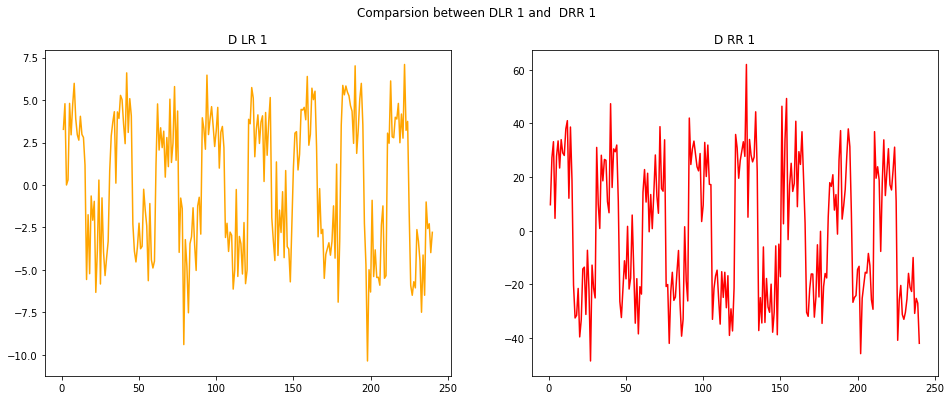

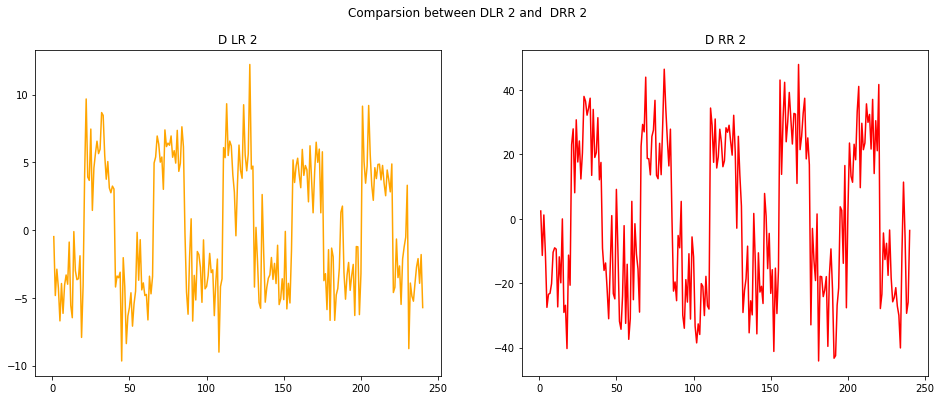

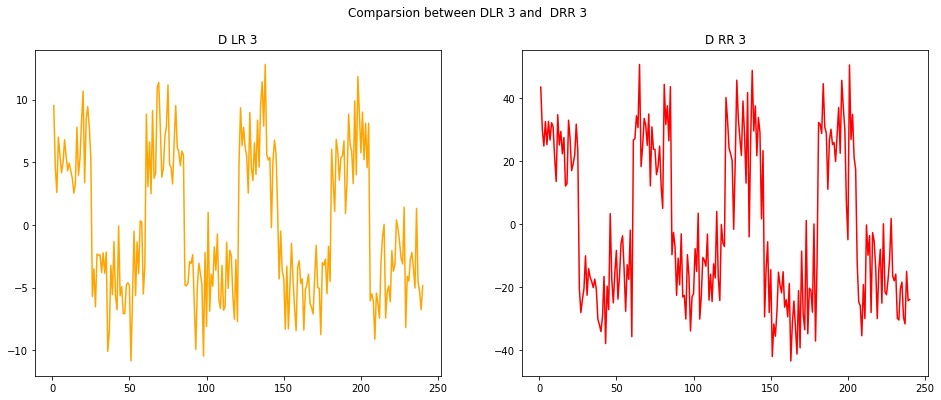

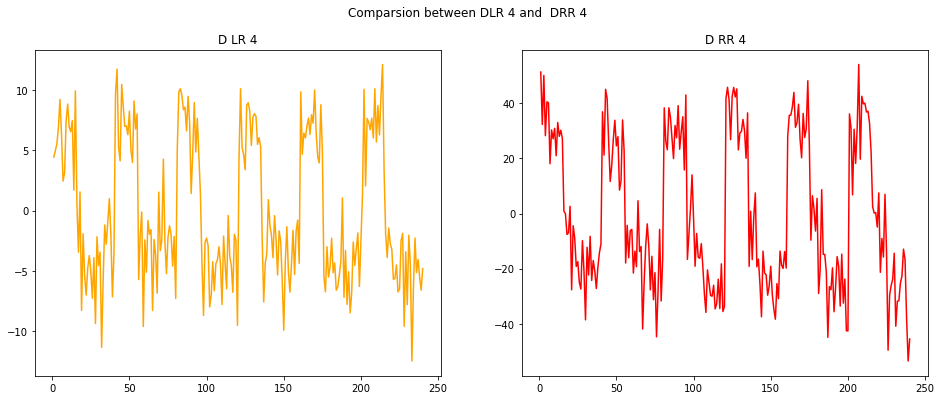

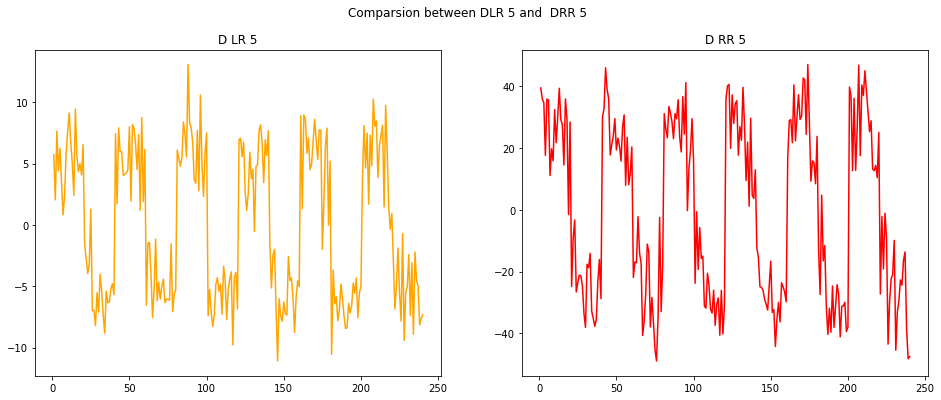

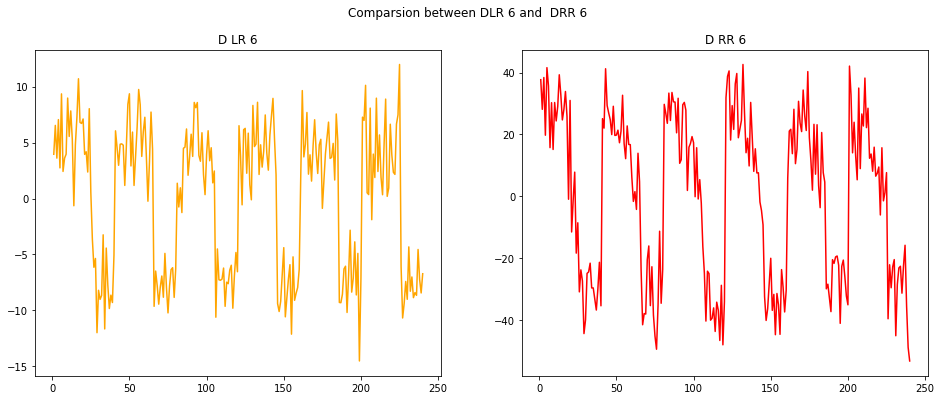

In [110]:
x = [i+1 for i in range(240)]
for i in range(6):
    fig, ax = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between DLR "  +str(i+1) +  " and  DRR " + str(i+1))
    ax[0].plot(x,D_LR[i], color = "orange")
    ax[1].plot(x,D_RR.iloc[:,i],color = "red")
    ax[0].set_title("D LR " + str(i+1))
    ax[1].set_title("D RR " + str(i + 1))
    fig.show()

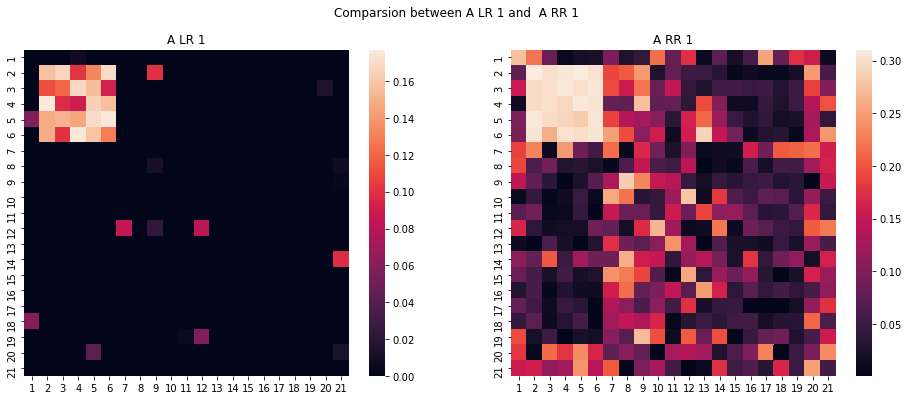

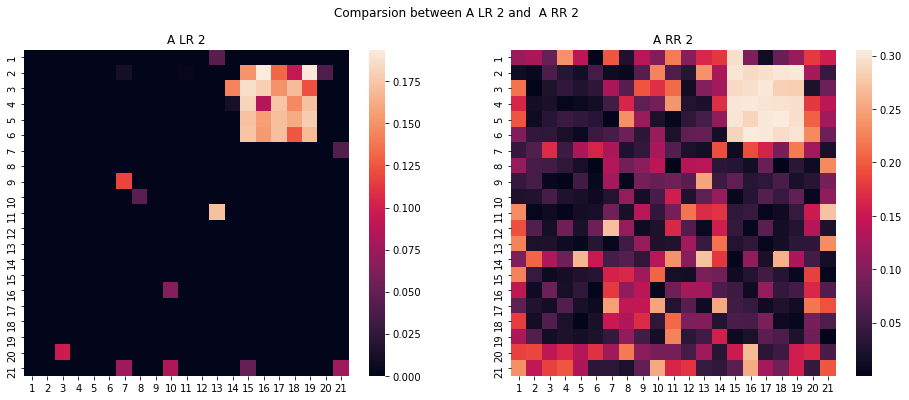

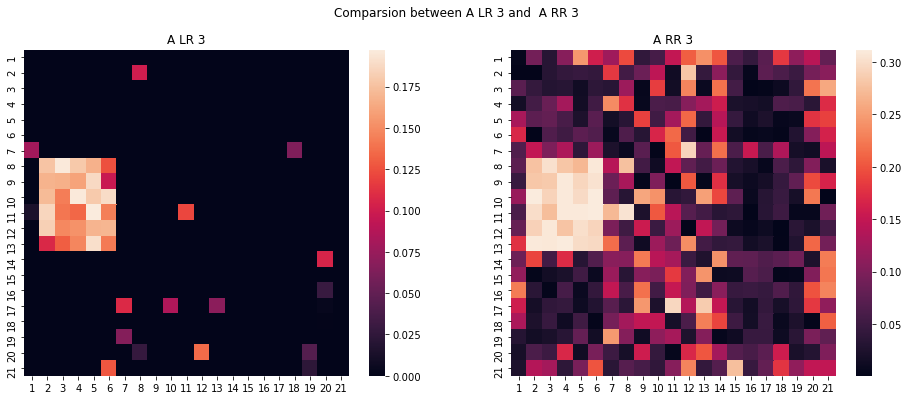

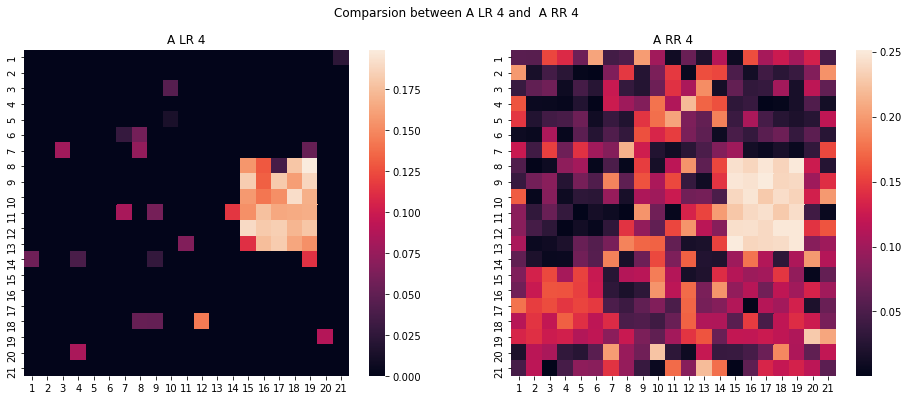

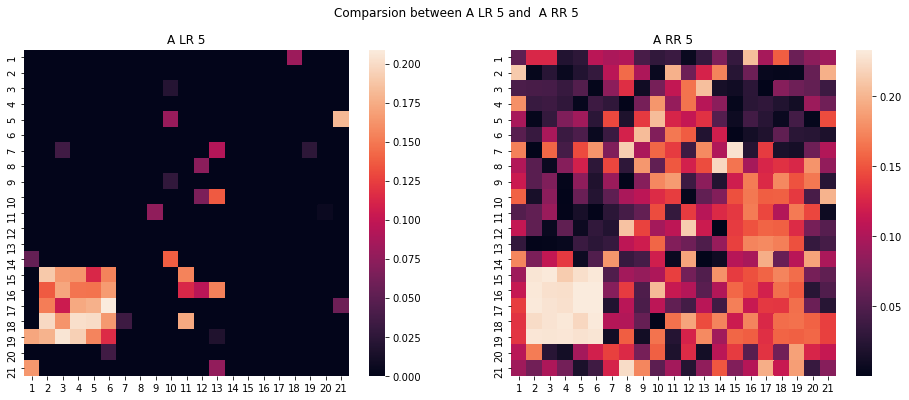

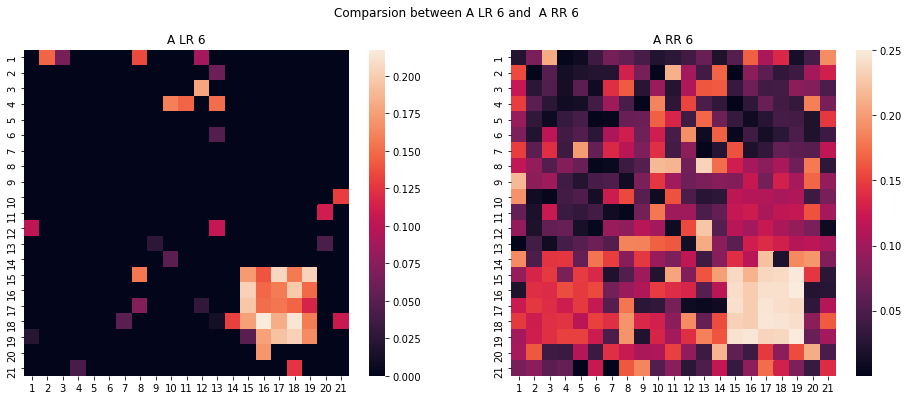

In [111]:
x = [i+1 for i in range(21)]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between A LR "  +str(i+1) +  " and  A RR " + str(i+1))
    sns.heatmap(abs(np.reshape(A_LR[i], (21,21))).transpose(),yticklabels=x,xticklabels=x,ax =ax1)
    sns.heatmap(abs(np.reshape(np.array(A_RR)[i],(21,21))).transpose(),yticklabels = x, xticklabels = x,ax = ax2)
    ax1.set_title("A LR " + str(i+1))
    ax2.set_title("A RR " + str(i + 1))
    fig.show()

### In estimated A_LR, many pixel values are now equal to zero and the retrieved Spatial Map obtained from Lasso Regression are much clearer as the noise data we once added to the X has been filtered out to zero.
### The direct result of this is that the number of false positive has been greatly reduced on the retrieved spatial map.

## 2.5

In [112]:
data_frame_time_courses.shape

(240, 6)

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PCs = pca.fit_transform(data_frame_time_courses)

In [114]:
for eigenvector in pca.components_:
    print(eigenvector)

[ 0.07547725 -0.00182036  0.07644906  0.55928169  0.59912548  0.56276821]
[ 0.65622983 -0.23060954  0.69510789 -0.09419415 -0.14242208  0.06204901]
[ 0.27383063  0.9228611   0.08033206  0.17961053 -0.03861215 -0.18204424]
[-0.69491023  0.15452469  0.70146127 -0.02395617 -0.00205921  0.02440991]
[ 0.02352637  0.26694917 -0.0822161  -0.68756474  0.02130854  0.66949671]
[-0.07230956  0.00189375 -0.07563011  0.41563487 -0.78664821  0.4443873 ]


In [115]:
eigenvalues = pca.explained_variance_

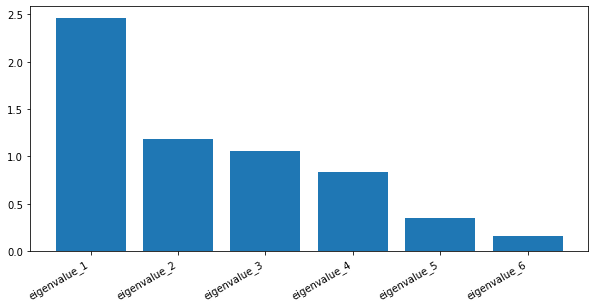

In [116]:
x = ["eigenvalue_1","eigenvalue_2","eigenvalue_3","eigenvalue_4","eigenvalue_5","eigenvalue_6"]
fig = plt.figure(figsize = (10,5))
plt.bar(x,eigenvalues)
fig.autofmt_xdate()

In [139]:
eigenvalues

array([2.46092846, 1.1797447 , 1.05321103, 0.83278942, 0.34463671,
       0.15379429])

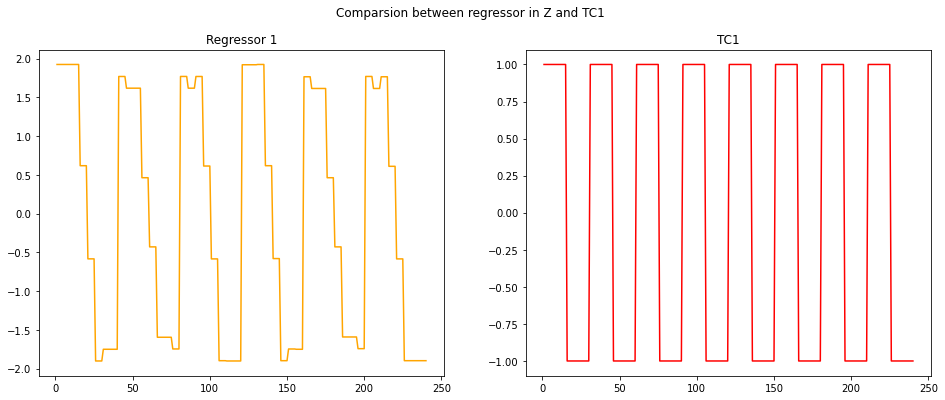

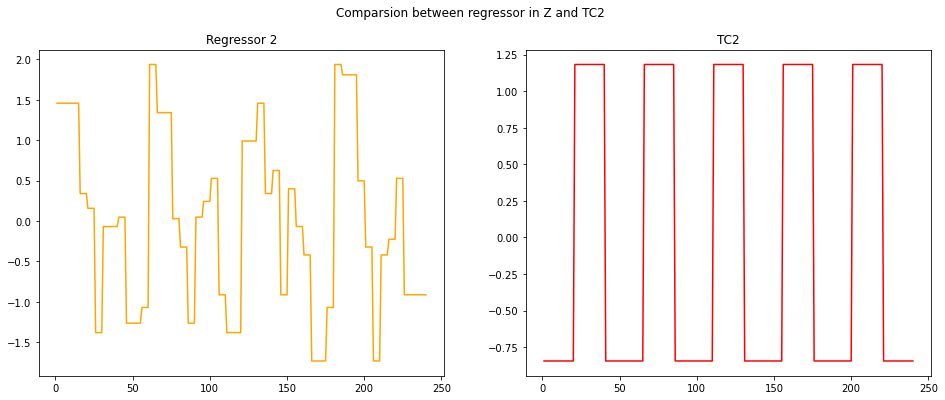

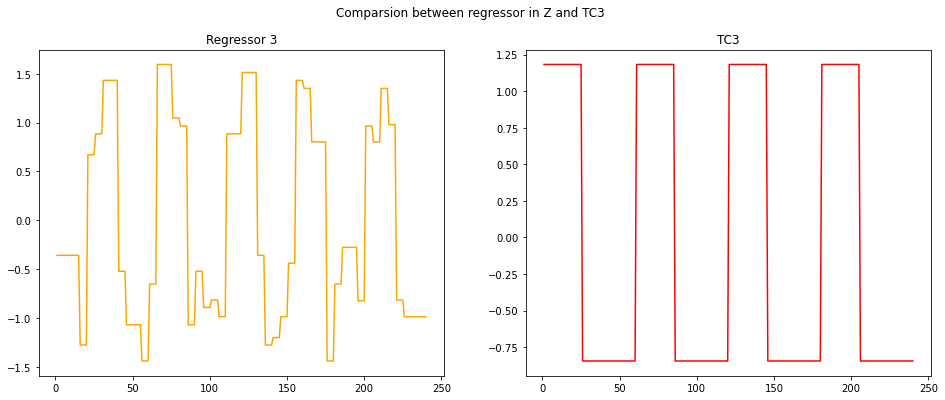

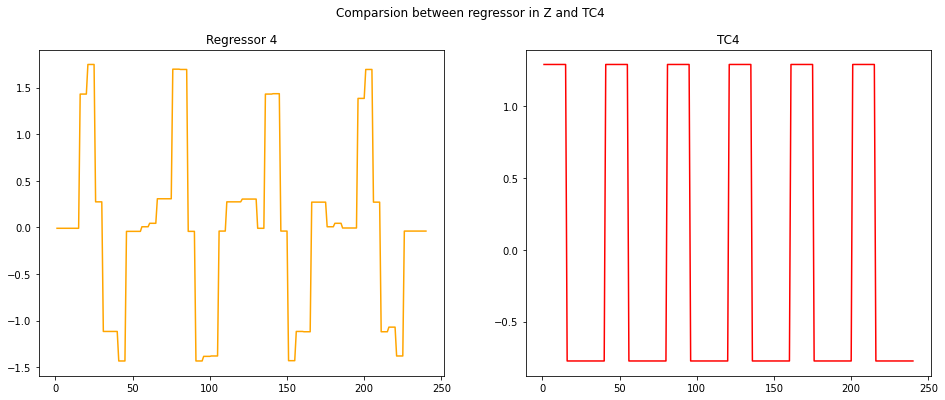

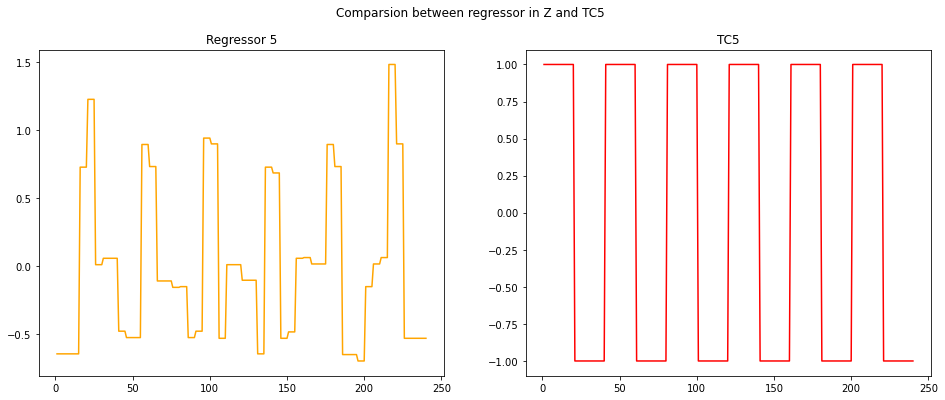

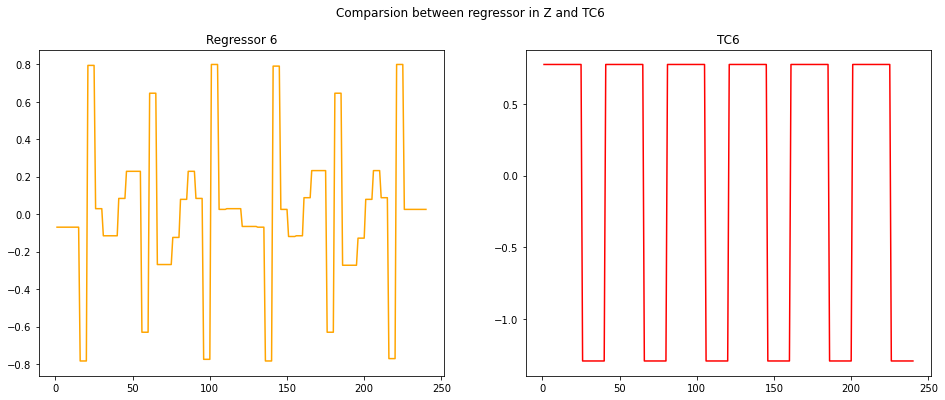

In [140]:
x = [i+1 for i in range(240)]
name_list = ["TC1","TC2","TC3","TC4","TC5","TC6"]
for i in range(6):
    fig, ax = plt.subplots(1,2, figsize = (16,6))
    fig.suptitle("Comparsion between regressor in Z and "  + name_list[i])
    ax[0].plot(x,PCs.T[i], color = "orange")
    ax[1].plot(x,data_frame_time_courses.iloc[:,i],color = "red")
    ax[0].set_title("Regressor " + str(i + 1))
    ax[1].set_title(name_list[i])
    fig.show()

In [118]:
clf = linear_model.Lasso(alpha=0.001)
clf.fit(PCs,Standardized_X)
A_PCA = clf.coef_.transpose()
D_PCA = np.matmul(Standardized_X,A_PCA.transpose())

In [119]:
print(A_PCA.shape)
print(D_PCA.shape)

(6, 441)
(240, 6)


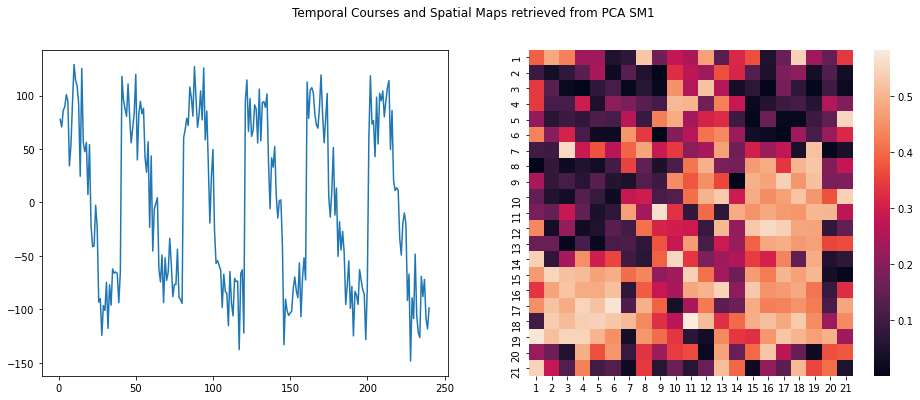

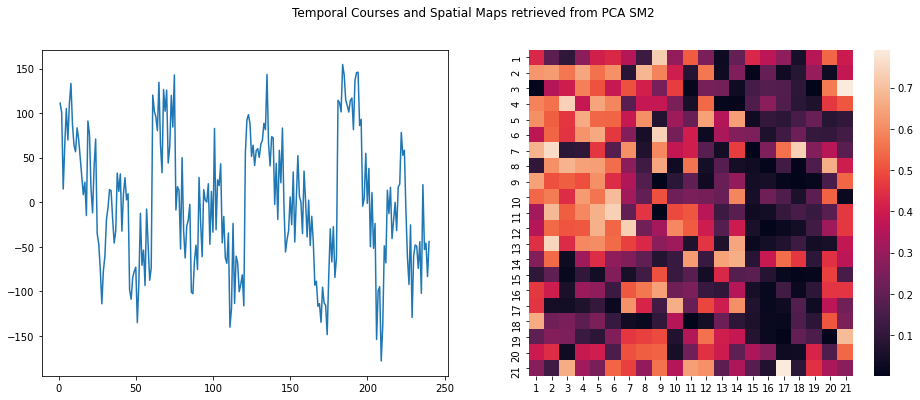

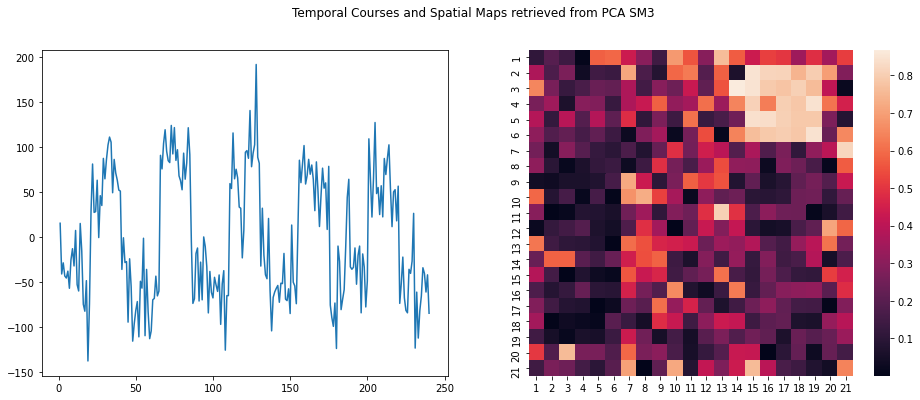

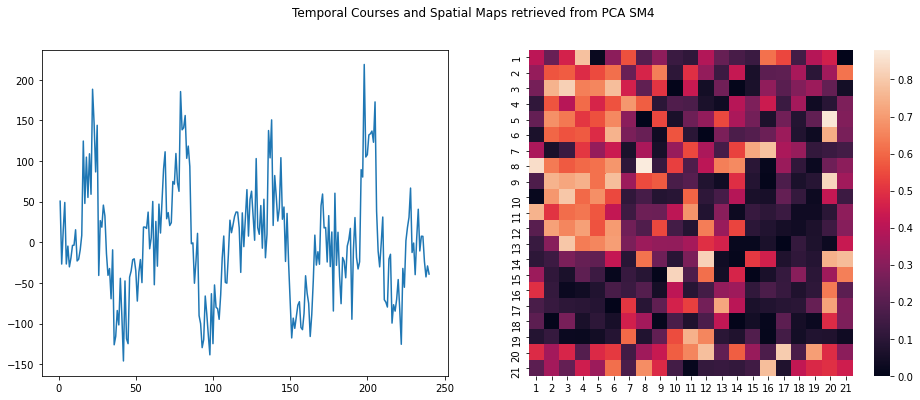

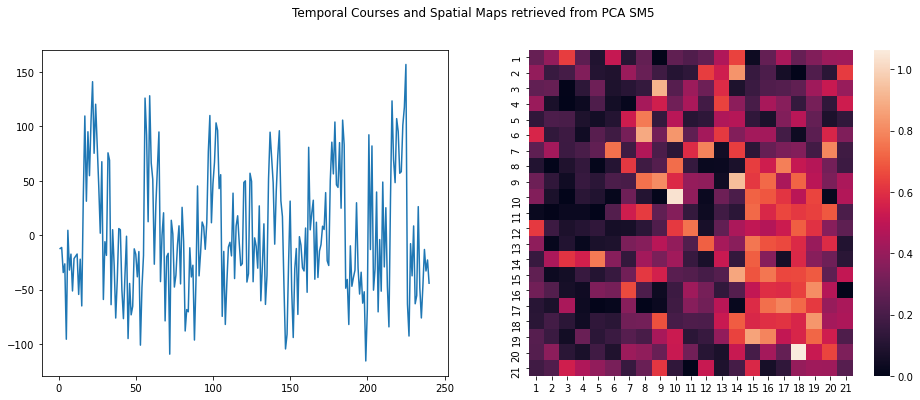

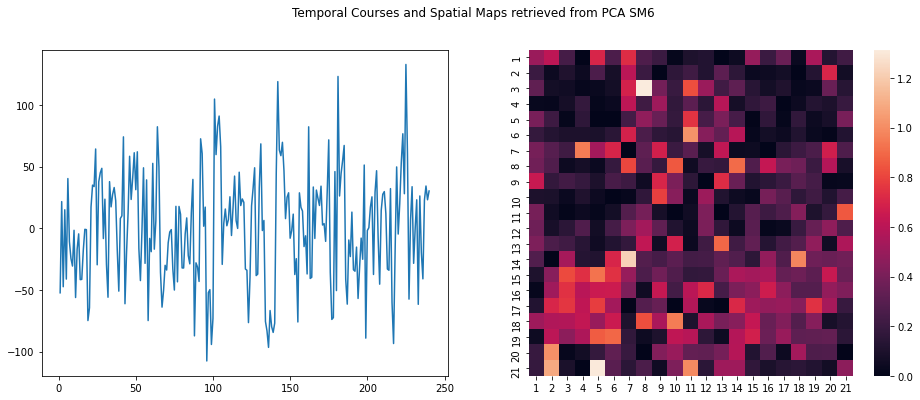

In [138]:
x = [i + 1 for i in range(21)]
x_240 = [i + 1 for i in range(240)]
name_list = ["SM1","SM2","SM3","SM4","SM5","SM6"]
for i in range(6):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,6))
    fig.suptitle("Temporal Courses and Spatial Maps retrieved from PCA " + name_list[i])
    ax1.plot(x_240,D_PCA[i])
    sns.heatmap(abs(np.reshape(np.array(A_PCA[i]),(21,21))).transpose(),yticklabels = x, xticklabels = x,ax = ax2)
    fig.show()

### The smallest eigenvalue we here is correspond to the last PC, which has the value of 0.15379429. From the plots of regressors in Z, the shapes of PCs are very distorted and unclear compared to the original TCs.   One possible for this shape lost is due to the procedure of Principle Component Analysis which captures the maximum variation along different TCs, only the components that are the most relevant to conserved in the regressors in Z after PCA.